# **Study Case 01 - Data Mining dan Business Intelligence: EDA pada data property**
-----
----

# **KELOMPOK 5B**
- Khaila Adhlia (NIM 11220940000012)
- Maila Hayati (NIM 11230940000004)
- Hardina Dewita (NIM 11230940000014)
- Anggita Sakato (NIM 11230940000047)
- Siti Aminah (NIM 11230940000068)

**Kasus:**
- Anda adalah seorang Data Analyst yang bekerja di PT Ray Pink Property Indonesia (RPPI).
- RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
- RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
- Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
- Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
- Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
- Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
- Di studi kasus ini anda mempersiapkan "bahan presentasi" dengan cara melakukan EDA pada data yang diterima dari DE/DBA.

**Petunjuk:**
<BR> Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi over lunch dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:

- Kualitas data yang dimiliki perusahaan.
- Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.
- Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
- Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
- Rumah dengan karakteristik seperti apa yang paling banyak dijual?
- Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
- Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

**Catatan:**
- Anda diperbolehkan melakukan augmentasi data (menambah data eksternal).
- Yakinkan menuliskan asumsi anda atas kesimpulan dan rekomendasi yang diberikan ke perusahaan.
- Yakinkan kesimpulan dan rekomendasi ditujukan ke perusahaan (bukan dosen mata kuliah).
- Anda boleh menggunakan software visualisasi apapun, misal excel, Ms Word, Photoshop, dsb.
- Yakinkan file images dapat dibuka (nampak) saat ipynb di Jupyter notebook anda dibuka di Google Colab.
- Tips: hati-hati dalam melakukan penamaan file, Google colab case sensitive.
- Interpretasi diberikan menggunakan cell markdown tepat dibawah output code yang relevan diatasnya.
- Anda tidak diperkenankan bertanya pertanyaan yang:
- Merupakan jawaban atau menjurus ke jawaban studi kasus.
- Debugging - code error (anda diharapkan melakukan code troubleshooting sendiri via mesin pencari)
- Pada studi kasus ini anda hanya diperkenankan untuk melakukan EDA (bukan modeling seperti prediksi/forecasting)
Komponen Penilaian:
Code tidak diubah sejak deadline studi kasus.
Code dapat di "Run-All" di Google Colab oleh dosen tanpa error.
Pemilihan preprocessing dan visualisasi yang tepat
Interpretasi dan rekomendasi dengan narasi dan kualitas yang baik, serta berdasarkan atas (pengolahan) data.
Kreativitas dan inovasi pengolahan data dan penyajian visualisasi.

**Data Understanding (DU):**
<br>Keterangan Varabel:
- Created_at: Tanggal dimana iklan rumah dibuat
- LT : Luas Tanah properti yang ditawarkan
- LB : Luas Bangunan properti yang ditawarkan
- KT : Jumlah Kamar Tidur properti yang ditawarkan
- KM : Jumlah Kamar Mandi properti yang ditawarkan
- Garasi : Jumlah Kapasitas Garasi di properti yang ditawarkan
- Carport : Kapasitas Carport di properti yang ditawarkan
- Lokasi : Detail lokasi properti yang ditawarkan
- Sertifikat: Jenis sertifikat properti yang ditawarkan
- Listrik : Daya listrik dari properti yang ditawarkan
- Hadap : Keterangan property yang ditawarkan menghadap ke arah mana
- Harga : Harga property yang ditawarkan dalam Rupiah
- URL : Alamat tautan (link) property yang ditawarkan.
- Deskripsi : Deskripsi iklan property yang ditawarkan.

# **IMPORT MODUL**

In [44]:
from os import statvfs
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime
import warnings
from scipy import stats

# Mengabaikan warning untuk tampilan yang lebih bersih
warnings.filterwarnings('ignore')

# Mengatur gaya visualisasi seaborn
sns.set(style="whitegrid") #latar putih + grid untuk mempercantik/menstandarkan gaya visualisasi

In [45]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")

dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

#**JAKARTA**

## Membaca Data

In [46]:
#DATA JAKARTA
dfJ.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
dfJ.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [48]:
# 10 baris Pertama dari Data
print("\n10 baris Pertama dari Data Jakarta:")
dfJ.head(10)


10 baris Pertama dari Data Jakarta:


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,06-12-2021,217.0,245.0,6.0,4.0,NaN,2.0,Jakarta Pusat,SHM,4400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,06-12-2021,424.0,1000.0,4.0,5.0,1.0,1.0,Jakarta Pusat,SHM,33000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,06-12-2021,597.0,700.0,5.0,4.0,2.0,5.0,Jakarta Pusat,SHM,8000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,06-12-2021,60.0,98.0,3.0,3.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,06-12-2021,33.0,42.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# 10 baris terakhir dari Data
dfJ.tail(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#CEK DATA
dfJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   121 non-null    object 
 1   LT           121 non-null    float64
 2   LB           121 non-null    float64
 3   KT           121 non-null    float64
 4   KM           121 non-null    float64
 5   garasi       44 non-null     float64
 6   carport      90 non-null     float64
 7   lokasi       121 non-null    object 
 8   sertifikat   119 non-null    object 
 9   listrik      120 non-null    float64
 10  hadap        36 non-null     object 
 11  harga        121 non-null    float64
 12  URL          121 non-null    object 
 13  deskripsi    112 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

## Prepocessing

pada data terlihat banyak baris dan kolom yang tidak berisi informasi apapun, kita bisa menghapus baris dan kolom tersebut karena tidak diperlukan

In [51]:
# MEMBUANG BARIS KOSONG YANG TIDAK MEMUAT INFORMASI APAPUN
dfJ.dropna(how = "all", inplace = True)

In [52]:
# MEMBUANG KOLOM KOSONG YANG TIDAK MEMUAT INFORMASI APAPUN
dfJ.dropna(how = "all", axis = 1, inplace = True)

In [53]:
# CEK DATA JAKARTA SETELAH PENGHAPUSAN BARIS DAN KOLOM YANG KOSONG
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,NaN,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


## Menghapus Duplikat

In [54]:
dfJ.duplicated().sum()

np.int64(0)

In [55]:
dfJ.shape

(121, 14)

Statistika Descriptive

In [56]:
print("\nDescriptive Statistics:")
print(dfJ.describe())


Descriptive Statistics:
                LT           LB          KT          KM     garasi    carport  \
count   121.000000   121.000000  121.000000  121.000000  44.000000  90.000000   
mean    247.586777   279.495868    4.272727    3.380165   1.863636   1.955556   
std     368.384642   285.275631    1.901754    1.709075   1.518734   1.475730   
min      16.000000    21.000000    1.000000    1.000000   1.000000   1.000000   
25%      84.000000    97.000000    3.000000    2.000000   1.000000   1.000000   
50%     135.000000   200.000000    4.000000    3.000000   1.000000   2.000000   
75%     250.000000   350.000000    5.000000    4.000000   2.000000   2.000000   
max    3422.000000  2000.000000   10.000000   10.000000   8.000000  10.000000   

            listrik         harga  
count    120.000000  1.210000e+02  
mean    5425.000000  8.985955e+09  
std     7891.589502  1.587610e+10  
min      900.000000  3.800000e+08  
25%     2200.000000  1.600000e+09  
50%     3500.000000  3.400000

In [57]:
dfJ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  121 non-null    object 
 1   LT          121 non-null    float64
 2   LB          121 non-null    float64
 3   KT          121 non-null    float64
 4   KM          121 non-null    float64
 5   garasi      44 non-null     float64
 6   carport     90 non-null     float64
 7   lokasi      121 non-null    object 
 8   sertifikat  119 non-null    object 
 9   listrik     120 non-null    float64
 10  hadap       36 non-null     object 
 11  harga       121 non-null    float64
 12  URL         121 non-null    object 
 13  deskripsi   112 non-null    object 
dtypes: float64(8), object(6)
memory usage: 14.2+ KB


## Missing Value

In [58]:
# Cek Missing Value
print("\nCek Missing Values di Data Tangerang:")
dfJ.isnull().sum()


Cek Missing Values di Data Tangerang:


,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,77
carport,31
lokasi,0
sertifikat,2
listrik,1


In [59]:
# Persentase Missing Value
(dfJ.isnull().sum()/len(dfJ)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,0.000000
LT,0.000000
LB,0.000000
KT,0.000000
KM,0.000000
garasi,63.636364
carport,25.619835
lokasi,0.000000
sertifikat,1.652893
listrik,0.826446


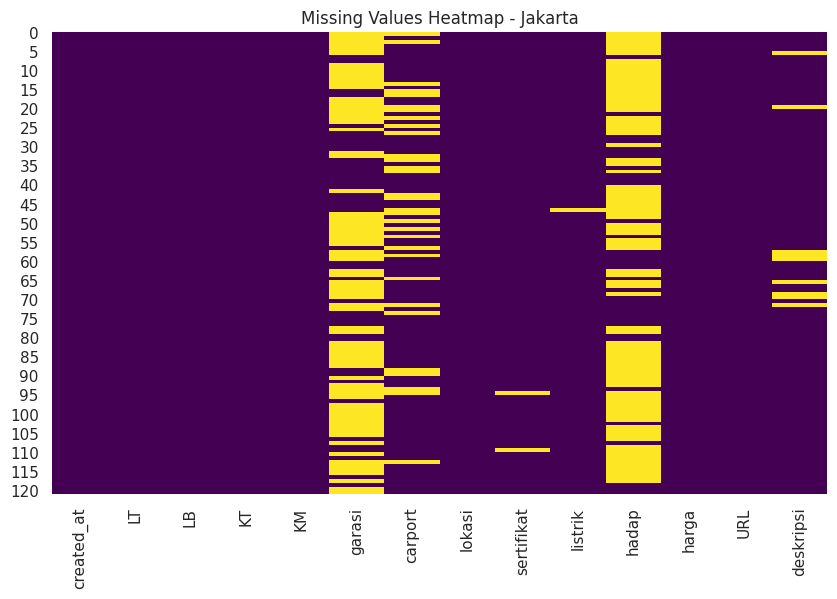

In [60]:
# Visualisasi Missing Value
plt.figure(figsize=(10,6))
sns.heatmap(dfJ.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Jakarta')
plt.show()

In [61]:
# Hapus kolom 'garasi' karena terlalu banyak missing (persentasi > 50%)
dfJ2 = dfJ.drop(columns=['garasi', 'hadap'])

In [62]:
# CEK DATA SETELAH KOLOM GARASI DAN HADAP DIHAPUS
dfJ2.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'carport', 'lokasi', 'sertifikat',
       'listrik', 'harga', 'URL', 'deskripsi'],
      dtype='object')

In [63]:
# MENGECEK SKEWNESS UNTUK MENENTUKAN IMPUTASI
print("carport:", dfJ2['KM'].skew())
print("Daya Listrik:", dfJ2['listrik'].skew())

carport: 1.3843564123844943
Daya Listrik: 4.965444851212696


Dari hasil tersebut dan berdasarkan aturan umum skewness maka:
- Nilai skewness < -1 atau sangat miring ke kiri maka gunakan median
- -1 ≤ nilai skewness ≤ 1 atau relatif simetris maka gunakan mean/median (sama saja) median lebih tahan kalau ada outlier
- Nilai skewness > 1 atau sangat miring ke kanan maka gunakan median (lebih tahan outlier)

In [64]:
# 1. Mengisi missing values untuk kolom numerik
dfJ2['carport'].fillna(0, inplace=True)  # Mengisi dengan 0 jika tidak ada carport
dfJ2['listrik'].fillna(dfJ2['listrik'].median(), inplace=True)  # Daya listrik

# Mengisi Missing Value dengan modus
dfJ2['sertifikat'].fillna(dfJ2['sertifikat'].mode()[0], inplace=True)

# 5. Mengisi missing values untuk kolom URL
dfJ2['deskripsi'].fillna('Tidak ada deskripsi', inplace=True)  # Mengisi dengan string tertentu

# Tampilkan DataFrame setelah mengisi missing values
print(dfJ2)

     created_at     LT     LB   KT   KM  carport         lokasi sertifikat  \
0    06-12-2021  202.0  198.0  8.0  3.0      0.0  Jakarta Pusat        SHM   
1    02-12-2021   30.0   55.0  2.0  1.0      1.0  Jakarta Pusat        SHM   
2    06-12-2021   19.0   35.0  2.0  1.0      0.0  Jakarta Pusat        SHM   
3    06-12-2021   33.0   42.0  2.0  2.0      1.0  Jakarta Pusat        SHM   
4    06-12-2021   30.0   55.0  2.0  2.0      1.0  Jakarta Pusat        SHM   
..          ...    ...    ...  ...  ...      ...            ...        ...   
116  22-11-2021  220.0  239.0  5.0  4.0      2.0  Jakarta Timur       PPJB   
117  06-12-2021   70.0   57.0  3.0  2.0      2.0  Jakarta Timur        SHM   
118  06-12-2021  315.0  280.0  4.0  3.0      2.0  Jakarta Timur  SHM + IMB   
119  06-12-2021  135.0  190.0  5.0  5.0      2.0  Jakarta Timur  SHM + IMB   
120  06-12-2021  144.0  250.0  5.0  5.0      2.0  Jakarta Timur        SHM   

     listrik         harga                                     

In [65]:
dfJ2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
carport,0
lokasi,0
sertifikat,0
listrik,0
harga,0


Mengubah Tipe Data

In [66]:
dfJ2.dtypes

,0
created_at,object
LT,float64
LB,float64
KT,float64
KM,float64
carport,float64
lokasi,object
sertifikat,object
listrik,float64
harga,float64


In [67]:
# Ubah tipe data
dfJ2['created_at'] = pd.to_datetime(dfJ2['created_at'], format='%d-%m-%Y')
dfJ2['lokasi'] = dfJ2['lokasi'].astype('category')
dfJ2['sertifikat'] = dfJ2['sertifikat'].astype('category')
dfJ2['LT'] = dfJ2['LT'].astype('int')
dfJ2['LB'] = dfJ2['LB'].astype('int')
dfJ2['KM'] = dfJ2['KM'].astype('int')
dfJ2['KT'] = dfJ2['KT'].astype('int')
dfJ2['carport'] = dfJ2['carport'].astype('int')
dfJ2['listrik'] = dfJ2['listrik'].astype('int')
dfJ2['harga'] = dfJ2['harga'].astype('int')
dfJ2.dtypes

,0
created_at,datetime64[ns]
LT,int64
LB,int64
KT,int64
KM,int64
carport,int64
lokasi,category
sertifikat,category
listrik,int64
harga,int64


Mengubah Satuan harga

In [68]:
harga_jakarta = dfJ2[['harga']]
print(harga_jakarta)

          harga
0    4500000000
1    1100000000
2     395000000
3     835000000
4    1100000000
..          ...
116  3850000000
117   880000000
118  4300000000
119  3400000000
120  2250000000

[121 rows x 1 columns]


## Cek Noise dan Outlier

In [69]:
# Mengecek noise dengan melihat distribusi dari variabel kategorik
dfJ2['lokasi'].value_counts()

,count
lokasi,
Jakarta Barat,25
Jakarta Utara,25
Jakarta Selatan,24
Jakarta Timur,24
Jakarta Pusat,23


In [70]:
dfJ2['sertifikat'].value_counts()

,count
sertifikat,
SHM,92
SHM + IMB,11
SHGB,8
PPJB,7
AJB,1
SHM + Hak Pakai,1
SHM + IMB + PBB,1


In [71]:
dfJ2['created_at'].value_counts()

,count
created_at,
2021-12-06,41
2021-12-07,14
2021-12-05,12
2021-12-02,8
2021-11-22,7
2021-11-06,7
2021-11-29,6
2021-12-03,4
2021-12-04,4


In [72]:
dfJ2['deskripsi'].value_counts()

,count
deskripsi,
Tidak ada deskripsi,9
Dekat Cikini Salemba Taman Isamail Marzuki Kampus Universitas Indonesia UI YAI RSCM dan RS. PGI Cikini,1
"Mengusung konsep minimalis, dan didukung dengan lingkungan yang tenang dan lokasi yang sangat strategis area Jakarta Pusat",1
"Berlokasi sangat strategis, sangat dekat ke Tugu Tani ataupun ke area ring satu Istana Negara",1
"Dekat dengan Mall Atrium Senen, dekat dengan area Kemayoran, dan dikelilingi lokasi Cempaka Putih, Gunung Sahari, dan Kwitang-Salemba",1
...,...
Rumah Mewah siap huni 2 lantai 220m 10x22 type4KT Cluster Palm Spring JGC Jakarta Garden City Cakung.,1
"Rumah Signature Location & Access :\n• 2 Menit ke Gerbang Tol Cimaci - Kota Wisata (In & Out)\n• 1 Menit ke Jalan Alternatif Transyogi\n• 10 Menit ke Tol Jagorawi & LRT\nLumihous Fully Furnish, Compact yet Modern Style, Glass Wall Living Room, Smart Furniture, Smart Home System",1
"Rumah 1, 5 Lantai Luas Strategis di Pondok Bambu Jakarta Timur, Fasilitas PDAM Jet pump. \nRS : Sam Marie Basra, Bunda Aliyah, Yadika.\nSwalayan : Tip top, Yogya, Naga.\nStarbucks, Burger King, Dunkin donuts, McDonalds\nMeeting point : Tip Top Pondok BambuFasilitas area :\n-/+ 11 KM ke Rasuna Said\n-/+ 8 KM ke Cawang",1


Batas bawah: -6875000000.0
Batas atas: 15725000000.0

Outliers:
0      True
1      True
2      True
3      True
4      True
       ... 
116    True
117    True
118    True
119    True
120    True
Name: harga, Length: 121, dtype: bool


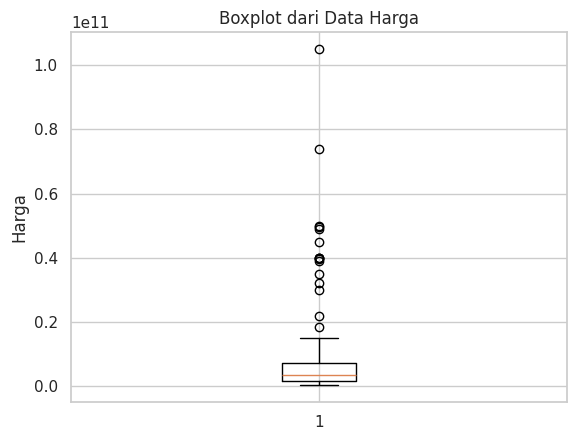

In [73]:
#  Mengecek outlier dengan melihat distribusi dari variabel kontinu
# Menghitung Q1 dan Q3 untuk mencari nilai IQR (IQR adalah ukuran sebaran data tengah, dan dipakai untuk deteksi outlier supaya lebih robust (tahan terhadap data ekstrem))
Q1 = dfJ2['harga'].quantile(0.25) # Kuartil bawah
Q3 = dfJ2['harga'].quantile(0.75) # Kuartil atas
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5* IQR

bukan_outlier = (dfJ2["harga"] >= batas_bawah) & (dfJ2["harga"] <= batas_atas)

# Buat DataFrame tanpa outlier
dfJ2_bukan_outlier = dfJ2[bukan_outlier]

# Buat DataFrame dengan outlier
dfJ2_outlier = dfJ2[~bukan_outlier]

# Menampilkan hasil
print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)
print("\nOutliers:")
print(bukan_outlier)

# Membuat boxplot
plt.boxplot(dfJ2['harga'])
plt.title("Boxplot dari Data Harga")
plt.ylabel("Harga")
plt.show()

In [74]:
# DataFrame tanpa outlier
dfJ2_bukan_outlier

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-12-06,202,198,8,3,0,Jakarta Pusat,SHM,2200,4500000000,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,2021-12-02,30,55,2,1,1,Jakarta Pusat,SHM,2200,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,2021-12-06,19,35,2,1,0,Jakarta Pusat,SHM,2200,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,2021-12-06,33,42,2,2,1,Jakarta Pusat,SHM,2200,835000000,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,2021-12-06,30,55,2,2,1,Jakarta Pusat,SHM,2200,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...
116,2021-11-22,220,239,5,4,2,Jakarta Timur,PPJB,3500,3850000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,2021-12-06,70,57,3,2,2,Jakarta Timur,SHM,2200,880000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,2021-12-06,315,280,4,3,2,Jakarta Timur,SHM + IMB,3500,4300000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,2021-12-06,135,190,5,5,2,Jakarta Timur,SHM + IMB,2200,3400000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


In [75]:
# DataFrame dengan outlier
dfJ2_outlier

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
6,2021-12-06,424,1000,4,5,1,Jakarta Pusat,SHM,33000,49500000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah mewah berkonsep hotel bintang 5, interio..."
7,2021-12-06,597,700,5,4,5,Jakarta Pusat,SHM,8000,40000000000,https://www.rumah.com/listing-properti/dijual-...,Lokasi strategis hanya 5 menit ke pusat kulin...
17,2021-12-05,652,405,5,4,4,Jakarta Pusat,SHM,6600,45000000000,https://www.rumah.com/listing-properti/dijual-...,Dapat dinego
18,2021-12-05,840,800,5,3,8,Jakarta Pusat,SHGB,6600,39990000000,https://www.rumah.com/listing-properti/dijual-...,"1 Arah, Trotoar Besar, pepohonan rindang asri ..."
21,2021-12-07,700,2000,10,10,10,Jakarta Pusat,SHM,66000,105000000000,https://www.rumah.com/listing-properti/dijual-...,- 2 menit ke Grand Indonesia (500 meter)\n- 5 ...
34,2021-12-06,485,550,3,5,1,Jakarta Selatan,SHM + IMB,18000,22000000000,https://rumahdijual.com/tebet/10851049-rmh-mew...,- Ruang Musik\n- Kitchen set ( dapur kotor dan...
40,2021-12-06,612,485,5,4,2,Jakarta Selatan,SHM,13000,18500000000,https://rumahdijual.com/jakarta-selatan/112558...,- Lantai Bawah : Master Bed Room dengan kamar ...
41,2021-12-06,790,700,6,6,6,Jakarta Selatan,SHM,7700,32000000000,https://rumahdijual.com/jakarta-selatan/110122...,Ada kolam renang
42,2021-12-05,950,1400,6,4,0,Jakarta Selatan,SHM,23000,49000000000,https://rumahdijual.com/jakarta-selatan/955358...,"Lantai 1 :\n- 1 Living Room, Family Room, Dinn..."
44,2021-12-07,738,500,5,3,2,Jakarta Selatan,SHM + IMB,13200,74000000000,https://rumahdijual.com/jakarta-pusat/6519312-...,- Unfurnished dan Air Jetpump\n- Berada dalam ...


#**BOGOR**

### **Membaca Data**

In [76]:
dfB

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Mengecek 10 baris pertama dari data
print("\n10 baris Pertama dari Data Bogor:")
dfB.head(10)


10 baris Pertama dari Data Bogor:


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,06-12-2021,120.0,70.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,06-12-2021,125.0,125.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,06-12-2021,97.0,72.0,3.0,2.0,0.0,1.0,Cibinong,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,06-12-2021,72.0,33.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,06-12-2021,60.0,30.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Mengecek 10 baris terakhir dari data
dfB.tail(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# Mengecek informasi data Depok
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   193 non-null    object 
 1   LT           193 non-null    float64
 2   LB           193 non-null    float64
 3   KT           193 non-null    float64
 4   KM           193 non-null    float64
 5   garasi       193 non-null    float64
 6   carport      193 non-null    float64
 7   lokasi       193 non-null    object 
 8   sertifikat   193 non-null    object 
 9   listrik      193 non-null    float64
 10  hadap        19 non-null     object 
 11  harga        193 non-null    float64
 12  URL          193 non-null    object 
 13  deskripsi    193 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

### **Preprocessing**

##### Dari data, terlihat banyak baris dan kolom yang tidak berisi informasi apapun. Sehingga, perlu dilakukan preprocessing supaya data lebih bersih, konsisten dan siap untuk di pakai

###### **Menghapus Variabel**

In [80]:
# Menghapus baris kosong yang tidak memuat informasi apapun
dfB.dropna(how = "all", inplace = True)

In [81]:
# MEMBUANG KOLOM KOSONG YANG TIDAK MEMUAT INFORMASI APAPUN
dfB.dropna(how = "all", axis = 1, inplace = True)

In [82]:
dfB

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,Barat,6.925500e+08,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,8.114000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,9.005000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,1.001900e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,NaN,1.200800e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,NaN,4.405500e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat taman buah mekarsari, dekat rumah sakit"
189,03-12-2021,107.0,31.0,2.0,1.0,0.0,1.0,Sukaraja,SHM,1300.0,NaN,4.086500e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah siap huni
190,03-12-2021,210.0,150.0,4.0,2.0,1.0,1.0,Bogor Selatan,SHM,2200.0,NaN,1.200000e+09,https://www.rumah.com/listing-properti/dijual-...,Cuma 10 menit ke kota
191,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Cileungsi,SHM,1300.0,NaN,4.405500e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat rumah sakit, dekat pasar"


In [83]:
# Mengecek nilai unik dari setiap kolom
for col in dfB.columns:
    print(f"Kolom: {col}")
    print(dfB[col].unique())
    print("-" * 50)

Kolom: created_at
['03-12-2021' '06-12-2021' '07-12-2021' '02-12-2021' '01-12-2021'
 '04-12-2021' '05-12-2021']
--------------------------------------------------
Kolom: LT
[  75.   60.   90.  120.  125.   97.   72.  312.  105.  112.  162.  200.
   50.   78.   84. 1500.  699.   66.  314. 1272.  338.   62.  196.  167.
   30.  128.  140.   98.   70.  144.   91.  108.  210.  156.  255.  270.
  240.  800.  280.  276.  437.  106.  180.  867.  696.  698.   81.   65.
  220.   93.   38.  102.  175.  100.  119.  188.  470.  150.  195.  142.
   89.  313.  131.   80.   79.  345.  206.  320. 1058.  168.   67.   74.
  107.]
--------------------------------------------------
Kolom: LB
[  38.   40.   50.   70.   60.  125.   72.   33.   30.  129.   51.   90.
  170.   79.   63.   39.   45.   36. 1200.  350.   62.  300.  500.   48.
  250.   43.   47.  202.   75.  164.   65.  260.  169.   25.  100.  200.
   49.  160.   37.   55.   42.   69.  150.  219.  358.   80.  400.  120.
  340.   54.  130.  650.   3

##### **Cek Duplikat dari Data**

In [84]:
# Mengecek total duplikat data
dfB.duplicated().sum()

np.int64(0)

Terlihat bahwa duplikatnya sudah tidak ada

In [85]:
# Mengecek ukuran data
dfB.shape

(193, 14)

##### **Cek Missing Value**

In [86]:
# Cek Missing Value
print("\nCek Missing Values di Data Bogor:")
dfB.isnull().sum()


Cek Missing Values di Data Bogor:


,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


In [87]:
# Persentase Missing Value
(dfB.isnull().sum()/len(dfB)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,0.00000
LT,0.00000
LB,0.00000
KT,0.00000
KM,0.00000
garasi,0.00000
carport,0.00000
lokasi,0.00000
sertifikat,0.00000
listrik,0.00000


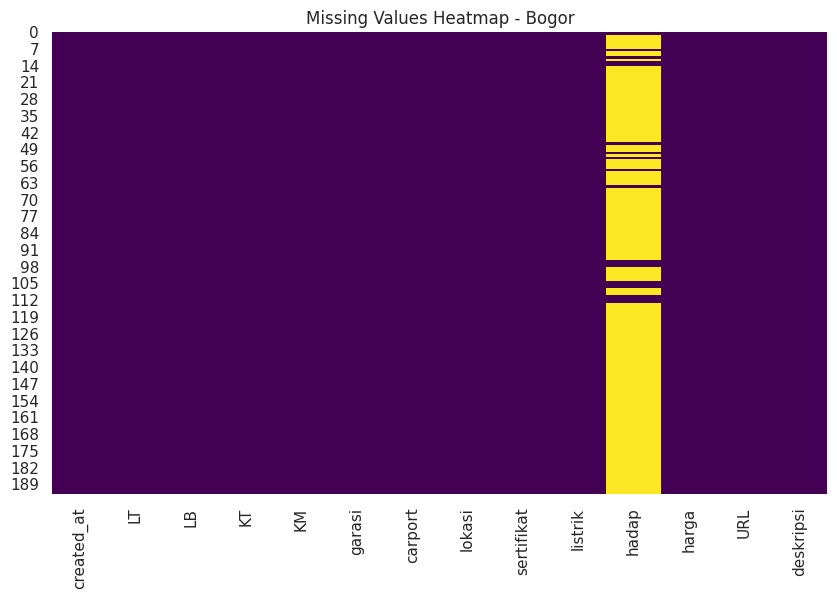

In [88]:
# Visualisasi Missing Value
plt.figure(figsize=(10,6))
sns.heatmap(dfB.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Bogor')
plt.show()

In [89]:
# Menghapus kolom 'hadap' karena terlalu banyak missing (persentasi > 50%)
dfB2 = dfB.drop(columns=['hadap'])
print(dfB2)

     created_at     LT     LB   KT   KM  garasi  carport          lokasi  \
0    03-12-2021   75.0   38.0  2.0  1.0     1.0      1.0      Bojonggede   
1    06-12-2021   60.0   40.0  1.0  1.0     0.0      1.0  Babakan Madang   
2    06-12-2021   60.0   50.0  2.0  2.0     0.0      1.0  Babakan Madang   
3    06-12-2021   60.0   70.0  3.0  2.0     0.0      1.0  Babakan Madang   
4    06-12-2021   90.0   60.0  3.0  2.0     0.0      2.0  Babakan Madang   
..          ...    ...    ...  ...  ...     ...      ...             ...   
188  03-12-2021   90.0   36.0  2.0  1.0     0.0      1.0    Gunung Putri   
189  03-12-2021  107.0   31.0  2.0  1.0     0.0      1.0        Sukaraja   
190  03-12-2021  210.0  150.0  4.0  2.0     1.0      1.0   Bogor Selatan   
191  03-12-2021   90.0   36.0  2.0  1.0     0.0      1.0       Cileungsi   
192  03-12-2021   72.0   90.0  3.0  2.0     1.0      1.0        Cibinong   

    sertifikat  listrik         harga  \
0          SHM   1300.0  6.925500e+08   
1    

In [90]:
# Mengecek apakah dikolom numerik lain ada nilai non-numerik
for col in dfB2.columns:
    print(f"\nKolom: {col}")
    print(dfB2[col].unique())
    print("Jumlah nilai unik:", dfB2[col].nunique())


Kolom: created_at
['03-12-2021' '06-12-2021' '07-12-2021' '02-12-2021' '01-12-2021'
 '04-12-2021' '05-12-2021']
Jumlah nilai unik: 7

Kolom: LT
[  75.   60.   90.  120.  125.   97.   72.  312.  105.  112.  162.  200.
   50.   78.   84. 1500.  699.   66.  314. 1272.  338.   62.  196.  167.
   30.  128.  140.   98.   70.  144.   91.  108.  210.  156.  255.  270.
  240.  800.  280.  276.  437.  106.  180.  867.  696.  698.   81.   65.
  220.   93.   38.  102.  175.  100.  119.  188.  470.  150.  195.  142.
   89.  313.  131.   80.   79.  345.  206.  320. 1058.  168.   67.   74.
  107.]
Jumlah nilai unik: 73

Kolom: LB
[  38.   40.   50.   70.   60.  125.   72.   33.   30.  129.   51.   90.
  170.   79.   63.   39.   45.   36. 1200.  350.   62.  300.  500.   48.
  250.   43.   47.  202.   75.  164.   65.  260.  169.   25.  100.  200.
   49.  160.   37.   55.   42.   69.  150.  219.  358.   80.  400.  120.
  340.   54.  130.  650.   32.  213.   24.   21.  108.   68.  240.   66.
   89.   58

In [91]:
# Cek Missing Value
print("\nCek Missing Values di Data Bogor:")
dfB2.isnull().sum()


Cek Missing Values di Data Bogor:


,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


In [92]:
# Persentase Missing Value
(dfB2.isnull().sum()/len(dfB2)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,0.0
LT,0.0
LB,0.0
KT,0.0
KM,0.0
garasi,0.0
carport,0.0
lokasi,0.0
sertifikat,0.0
listrik,0.0


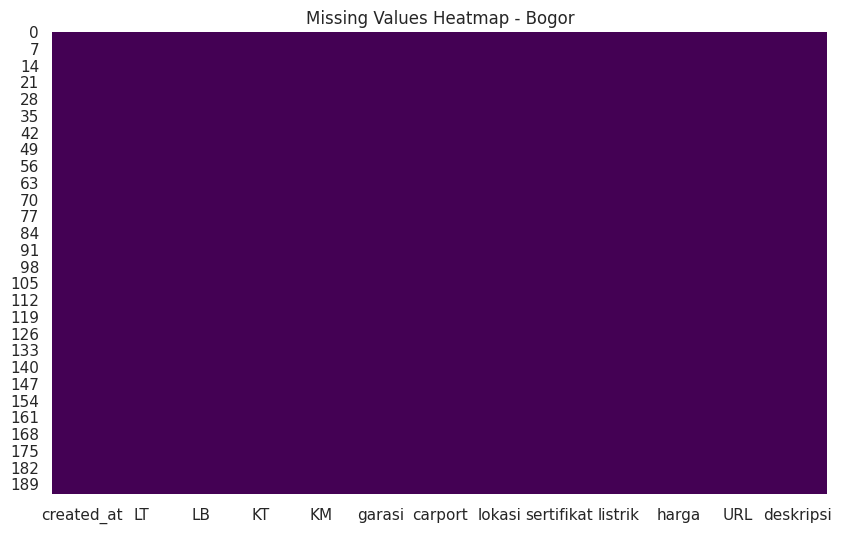

In [93]:
# Visualisasi Missing Value setelah ditangani dengan imputasi
plt.figure(figsize=(10,6))
sns.heatmap(dfB2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Bogor')
plt.show()

##### **Mengubah Tipe Data**

In [94]:
# Mengecek tipe data
dfB2.dtypes

,0
created_at,object
LT,float64
LB,float64
KT,float64
KM,float64
garasi,float64
carport,float64
lokasi,object
sertifikat,object
listrik,float64


In [95]:
# Cek jumlah nilai unik untuk semua kolom
for col in dfB2.columns:
    print(f"Kolom: {col}")
    print(f"Jumlah nilai unik: {dfB2[col].nunique()}")
    print(f"Total baris: {len(dfB2)}")
    print("-" * 40)

Kolom: created_at
Jumlah nilai unik: 7
Total baris: 193
----------------------------------------
Kolom: LT
Jumlah nilai unik: 73
Total baris: 193
----------------------------------------
Kolom: LB
Jumlah nilai unik: 67
Total baris: 193
----------------------------------------
Kolom: KT
Jumlah nilai unik: 7
Total baris: 193
----------------------------------------
Kolom: KM
Jumlah nilai unik: 6
Total baris: 193
----------------------------------------
Kolom: garasi
Jumlah nilai unik: 4
Total baris: 193
----------------------------------------
Kolom: carport
Jumlah nilai unik: 8
Total baris: 193
----------------------------------------
Kolom: lokasi
Jumlah nilai unik: 27
Total baris: 193
----------------------------------------
Kolom: sertifikat
Jumlah nilai unik: 3
Total baris: 193
----------------------------------------
Kolom: listrik
Jumlah nilai unik: 8
Total baris: 193
----------------------------------------
Kolom: harga
Jumlah nilai unik: 147
Total baris: 193
--------------------

In [96]:
# Hitung persentase nilai unik untuk kolom object
total_rows = len(dfB2)

print("Persentase nilai unik untuk kolom object:\n")
for col in dfB2.select_dtypes(include='object').columns:
    unique_count = dfB2[col].nunique()
    percent = (unique_count / total_rows) * 100
    print(f"{col:<12} : {unique_count} unik dari {total_rows} baris "
          f"({percent:.1f}%)")

Persentase nilai unik untuk kolom object:

created_at   : 7 unik dari 193 baris (3.6%)
lokasi       : 27 unik dari 193 baris (14.0%)
sertifikat   : 3 unik dari 193 baris (1.6%)
URL          : 186 unik dari 193 baris (96.4%)
deskripsi    : 171 unik dari 193 baris (88.6%)


Berdasarkan persentase nilai unik dari kolom object, kolom yang persentasenya lebih dari 20%, yaitu 'lokasi', 'URL', dan 'deskripsi' yang hampir sama persis dengan total baris data, sebaiknya tidak diubah jadi tipe data category karena bisa menghabiskan memory dan tidak efisien

In [97]:
# Mengubah tipe data
dfB2['created_at'] = pd.to_datetime(dfB2['created_at'], format='%d-%m-%Y', errors='coerce')
dfB2['LT'] = dfB2['LT'].astype('int64')
dfB2['LB'] = dfB2['LB'].astype('int64')
dfB2['KT'] = dfB2['KT'].astype('int64')
dfB2['KM'] = dfB2['KM'].astype('int64')
dfB2['garasi'] = dfB2['garasi'].astype('int64')
dfB2['carport'] = dfB2['carport'].astype('int64')
dfB2['listrik'] = dfB2['listrik'].astype('int64')
dfB2['harga'] = dfB2['harga'].astype('int64')
dfB2['lokasi'] = dfB2['lokasi'].astype('category')
dfB2['sertifikat'] = dfB2['sertifikat'].astype('category')
dfB2.dtypes

,0
created_at,datetime64[ns]
LT,int64
LB,int64
KT,int64
KM,int64
garasi,int64
carport,int64
lokasi,category
sertifikat,category
listrik,int64


Mengubah tipe data dari float ke int supaya nilainya bulat, lebih efisien, dan rapih. Serta mengubah tipe data dari object ke category supaya lebih hemat memori.

##### **Mengubah satuan harga ke rupiah**

Hal ini dilakukan supaya variabel harga akurat, konsisten, dan tidak membingungkan saat dipakai untuk analisis

In [98]:
harga_bogor = dfB2[['harga']]
print(harga_bogor)

          harga
0     692550000
1     811400000
2     900500000
3    1001900000
4    1200800000
..          ...
188   440550000
189   408650000
190  1200000000
191   440550000
192   900000000

[193 rows x 1 columns]


In [99]:
# Mengecek data setelah variabel harga diubah ke rupiah
dfB2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-12-03,75,38,2,1,1,1,Bojonggede,SHM,1300,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,2021-12-06,60,40,1,1,0,1,Babakan Madang,SHM,2200,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,2021-12-06,60,50,2,2,0,1,Babakan Madang,SHM,2200,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,2021-12-06,60,70,3,2,0,1,Babakan Madang,SHM,2200,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,2021-12-06,90,60,3,2,0,2,Babakan Madang,SHM,2200,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2021-12-03,90,36,2,1,0,1,Gunung Putri,SHM,1300,440550000,https://www.rumah.com/listing-properti/dijual-...,"Dekat taman buah mekarsari, dekat rumah sakit"
189,2021-12-03,107,31,2,1,0,1,Sukaraja,SHM,1300,408650000,https://www.rumah.com/listing-properti/dijual-...,Rumah siap huni
190,2021-12-03,210,150,4,2,1,1,Bogor Selatan,SHM,2200,1200000000,https://www.rumah.com/listing-properti/dijual-...,Cuma 10 menit ke kota
191,2021-12-03,90,36,2,1,0,1,Cileungsi,SHM,1300,440550000,https://www.rumah.com/listing-properti/dijual-...,"Dekat rumah sakit, dekat pasar"


In [100]:
dfB2['harga'] = dfB['harga'] / 1000000

In [101]:
harga_bogor = dfB2[['harga']]
print(harga_bogor)

       harga
0     692.55
1     811.40
2     900.50
3    1001.90
4    1200.80
..       ...
188   440.55
189   408.65
190  1200.00
191   440.55
192   900.00

[193 rows x 1 columns]


##### **Cek noise dan outlier**

In [102]:
# Mengecek noise dengan melihat distribusi dari variabel kategorik
dfB2['lokasi'].value_counts()

,count
lokasi,
Gunung Putri,26
Babakan Madang,25
Parung,20
Bogor Barat,16
Bojonggede,12
Cibinong,12
Cileungsi,11
Bogor Utara,11
Jonggol,7


In [103]:
dfB2['sertifikat'].value_counts()

,count
sertifikat,
SHM,155
SHGB,33
Lainnya,5


In [104]:
dfB2['created_at'].value_counts()

,count
created_at,
2021-12-06,52
2021-12-07,40
2021-12-03,21
2021-12-02,20
2021-12-01,20
2021-12-04,20
2021-12-05,20


In [105]:
dfB2['URL'].value_counts()

,count
URL,
https://www.rumah123.com/perumahan-baru/properti/bogor/adhi-city-Babakan Madang/nps1964/,6
https://www.rumah.com/listing-properti/dijual-kemang-eminence-bogor-oleh-aditya-santoso-19253196,2
https://www.rumah.com/listing-properti/dijual-permata-nusa-indah-situsari-cileungsi-bogor-oleh-agus-rohman-17221797,2
https://www.rumah123.com/properti/bogor/hos9203763/,1
https://www.rumah123.com/properti/bogor/hos8947550/,1
...,...
https://www.rumah.com/listing-properti/dijual-hunian-cluster-missiissippi-kota-wisata-cibubur-oleh-rahadiyanuar-zaini-19353385,1
https://www.rumah.com/listing-properti/dijual-green-parung-indah-oleh-gina-lolita-18295645,1
https://www.rumah.com/listing-properti/dijual-rumah-dijual-di-cileungsi-350-jtan-dekat-jalan-utama-deket-jalan-toll-dan-terminal-oleh-agus-rohman-17218552,1


In [106]:
dfB2['deskripsi'].value_counts()

,count
deskripsi,
"Destinasi menarik di kawasan Babakan Madang; Gunung Pancar, Taman Budaya, Babakan Madang Highland, JungleLand, Stadion Pakansari, Leuwi Hejo",6
"Fasilitas masjid, taman, jogging track, keamanan",4
"Lokasi strategis, Fasilitas lengkap",4
Villa bogor indah 6,3
Lokasi strategis,3
...,...
"Taman, Children Playground",1
"Dekat taman buah mekarsari, dekat rumah sakit",1
Cuma 10 menit ke kota,1


Batas bawah: -877.5
Batas atas: 2526.5

Outliers:
0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: harga, Length: 193, dtype: bool


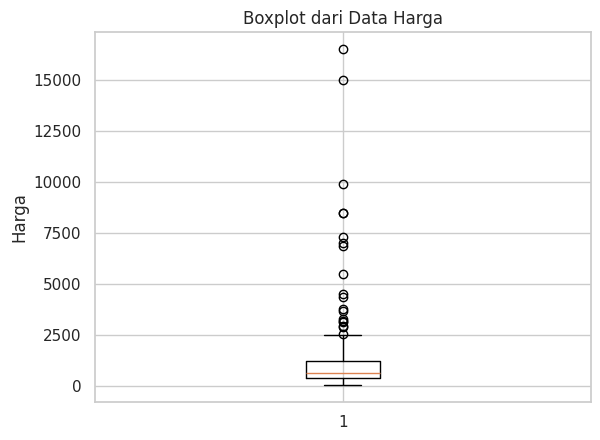

In [107]:
#  Mengecek outlier dengan melihat distribusi dari variabel kontinu
# Menghitung Q1 dan Q3
Q1 = dfB2['harga'].quantile(0.25)
Q3 = dfB2['harga'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5* IQR

bukan_outlier = (dfB2["harga"] >= Q1 - 1.5 * IQR) & (dfB["harga"] <= Q3 + 1.5*IQR)

# BUat DataFrame tanpa outlier
dfB2_bukan_outlier = dfB2[bukan_outlier]

# Creating DataFrame With Outliers
dfB2_outlier = dfB2[~bukan_outlier]

# Menampilkan hasil
print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)
print("\nOutliers:")
print(bukan_outlier)

# Membuat boxplot
plt.boxplot(dfB2['harga'])
plt.title("Boxplot dari Data Harga")
plt.ylabel("Harga")
plt.show()

In [108]:
dfB2_bukan_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi


In [109]:
dfB2_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-12-03,75,38,2,1,1,1,Bojonggede,SHM,1300,692.55,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,2021-12-06,60,40,1,1,0,1,Babakan Madang,SHM,2200,811.40,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,2021-12-06,60,50,2,2,0,1,Babakan Madang,SHM,2200,900.50,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,2021-12-06,60,70,3,2,0,1,Babakan Madang,SHM,2200,1001.90,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,2021-12-06,90,60,3,2,0,2,Babakan Madang,SHM,2200,1200.80,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2021-12-03,90,36,2,1,0,1,Gunung Putri,SHM,1300,440.55,https://www.rumah.com/listing-properti/dijual-...,"Dekat taman buah mekarsari, dekat rumah sakit"
189,2021-12-03,107,31,2,1,0,1,Sukaraja,SHM,1300,408.65,https://www.rumah.com/listing-properti/dijual-...,Rumah siap huni
190,2021-12-03,210,150,4,2,1,1,Bogor Selatan,SHM,2200,1200.00,https://www.rumah.com/listing-properti/dijual-...,Cuma 10 menit ke kota
191,2021-12-03,90,36,2,1,0,1,Cileungsi,SHM,1300,440.55,https://www.rumah.com/listing-properti/dijual-...,"Dekat rumah sakit, dekat pasar"


# **DEPOK**

### **Membaca Data**

In [110]:
dfD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Depok terdiri dari 998 baris dan 26 kolom

In [111]:
# Mengecek kolom yang tersedia dari data
dfD.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [112]:
# Mengecek 10 baris pertama dari data
print("\n10 baris Pertama dari Data Depok:")
dfD.head(10)


10 baris Pertama dari Data Depok:


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6-12-2021,40,30.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6-12-2021,45,115.0,2.0,1.0,NaN,1.0,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6-12-2021,36,60.0,2.0,1.0,NaN,1.0,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6-12-2021,87,72.0,3.0,2.0,NaN,2.0,Sawangan,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# Mengecek 10 baris terakhir dari data
dfD.tail(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
# Mengecek informasi data Depok
dfD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   119 non-null    object 
 1   LT           120 non-null    object 
 2   LB           118 non-null    float64
 3   KT           118 non-null    float64
 4   KM           118 non-null    float64
 5   garasi       25 non-null     float64
 6   carport      94 non-null     float64
 7   lokasi       118 non-null    object 
 8   sertifikat   118 non-null    object 
 9   listrik      103 non-null    float64
 10  hadap        62 non-null     object 
 11  harga        118 non-null    float64
 12  URL          118 non-null    object 
 13  deskripsi    118 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

### **Preprocessing**

##### Dari data, terlihat banyak baris dan kolom yang tidak berisi informasi apapun. Sehingga, perlu dilakukan preprocessing supaya data lebih bersih, konsisten dan siap untuk di pakai

###### **Menghapus Variabel**

In [115]:
# Menghapus baris kosong yang tidak memuat informasi apapun
dfD.dropna(how = "all", inplace = True)

In [116]:
# Menghapus kolom kosong yang tidak memuat informasi apapun
dfD.dropna(how = "all", axis = 1, inplace = True)

In [117]:
# Mengecek data Depok setelah penghapusan baris dan kolom yang kosong
dfD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Timur,195.0,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
117,4-12-2021,100,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,NaN,1750.0,https://www.rumah123.com/properti/depok/hos928...,Dijual cepat rumah bagus siap huni
120,NOTE:,- lokasi yang kami gunakan hanya per kecamatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Setelah dilakukan penghapusan pada baris dan kolom yang tidak memuat informasi apapun maka jumlah baris dan kolom yang tersisa ialah 120 baris dan 14 kolom

In [118]:
# Mengecek nilai unik dari setiap kolom
for col in dfD.columns:
    print(f"Kolom: {col}")
    print(dfD[col].unique())
    print("-" * 50)

Kolom: created_at
['6-12-2021' '5-12-2021' '4-12-2021' 'NOTE:' nan]
--------------------------------------------------
Kolom: LT
['165' '50' '72' '40' '45' '36' '87' '210' '60' '70' '200' '57' '100' '97'
 '112' '84' '75' '487' '378' '400' '77' '1024' '120' '151' '885' '54'
 '249' '76' '66' '79' '78' '105' '63' '62' '71' '92' '96' '65' '104' '110'
 '64' '51' '85' '81' '59' '88' '47' '55' '82' '185' '880' '74' '335' '83'
 '94' '80' '- lokasi yang kami gunakan hanya per kecamatan'
 '-harga yang kami gunakan adalah per satuan juta']
--------------------------------------------------
Kolom: LB
[200.  45.  36.  30. 115.  60.  72.  48. 250.  50. 150.  40.  66. 109.
  73.  54. 450. 289. 226. 130. 400. 103. 180. 600.  47.  80. 260. 105.
 160.  70.  68.  75. 100.  77.  51.  61. 110.  58. 120.  55.  62.  42.
  46.  71.  63. 140. 300.  56.  15.  nan]
--------------------------------------------------
Kolom: KT
[ 4.  2.  3.  6.  5.  7. nan]
--------------------------------------------------
Kolom: 

##### **Cek Duplikat dari Data**

In [119]:
# Mengecek total duplikat dari data
dfD.duplicated().sum()

np.int64(0)

Setelah dilakukan pengecekan maka tidak terdapat data yang duplikasi

##### **Cek Missing Value**

In [120]:
# Cek Missing Value
print("\nCek Missing Values di Data Depok:")
dfD.isnull().sum()


Cek Missing Values di Data Depok:


,0
created_at,1
LT,0
LB,2
KT,2
KM,2
garasi,95
carport,26
lokasi,2
sertifikat,2
listrik,17


In [121]:
# Persentase Missing Value
(dfD.isnull().sum()/len(dfD)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,0.833333
LT,0.000000
LB,1.666667
KT,1.666667
KM,1.666667
garasi,79.166667
carport,21.666667
lokasi,1.666667
sertifikat,1.666667
listrik,14.166667


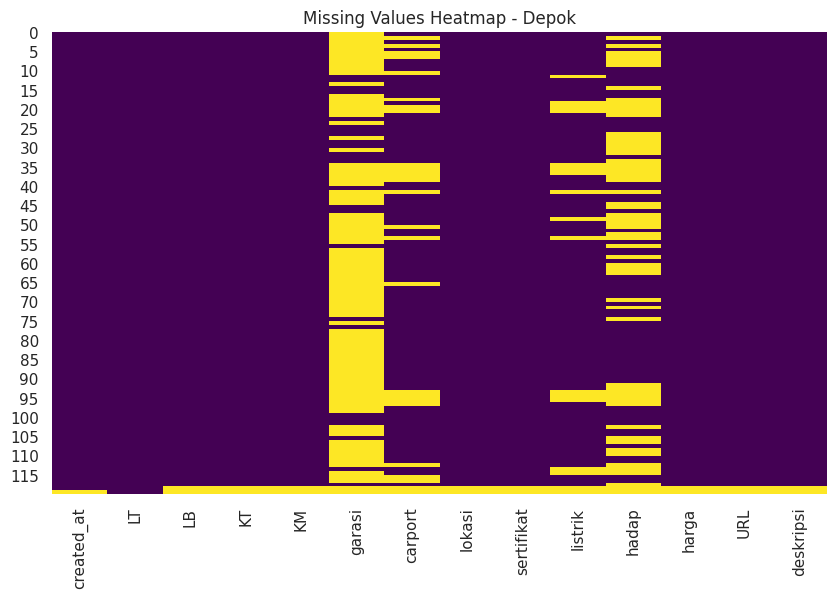

In [122]:
# Visualisasi Missing Value
plt.figure(figsize=(10,6))
sns.heatmap(dfD.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Depok')
plt.show()

In [123]:
# Menghapus kolom 'garasi' karena terlalu banyak missing (persentasi > 50%)
dfD2 = dfD.drop(columns=['garasi'])
print(dfD2)

    created_at                                               LT     LB   KT  \
0    6-12-2021                                              165  200.0  4.0   
1    6-12-2021                                               50   45.0  2.0   
2    6-12-2021                                               50   36.0  2.0   
3    6-12-2021                                               50   45.0  2.0   
4    6-12-2021                                               72   45.0  2.0   
..         ...                                              ...    ...  ...   
115  4-12-2021                                               40   40.0  2.0   
116  4-12-2021                                               50   50.0  2.0   
117  4-12-2021                                              100   15.0  3.0   
120      NOTE:   - lokasi yang kami gunakan hanya per kecamatan    NaN  NaN   
121        NaN  -harga yang kami gunakan adalah per satuan juta    NaN  NaN   

      KM  carport     lokasi sertifikat  listrik   

In [124]:
# Mengecek apakah dikolom numerik lain ada nilai non-numerik
for col in dfD2.columns:
    print(f"\nKolom: {col}")
    print(dfD2[col].unique())
    print("Jumlah nilai unik:", dfD2[col].nunique())


Kolom: created_at
['6-12-2021' '5-12-2021' '4-12-2021' 'NOTE:' nan]
Jumlah nilai unik: 4

Kolom: LT
['165' '50' '72' '40' '45' '36' '87' '210' '60' '70' '200' '57' '100' '97'
 '112' '84' '75' '487' '378' '400' '77' '1024' '120' '151' '885' '54'
 '249' '76' '66' '79' '78' '105' '63' '62' '71' '92' '96' '65' '104' '110'
 '64' '51' '85' '81' '59' '88' '47' '55' '82' '185' '880' '74' '335' '83'
 '94' '80' '- lokasi yang kami gunakan hanya per kecamatan'
 '-harga yang kami gunakan adalah per satuan juta']
Jumlah nilai unik: 58

Kolom: LB
[200.  45.  36.  30. 115.  60.  72.  48. 250.  50. 150.  40.  66. 109.
  73.  54. 450. 289. 226. 130. 400. 103. 180. 600.  47.  80. 260. 105.
 160.  70.  68.  75. 100.  77.  51.  61. 110.  58. 120.  55.  62.  42.
  46.  71.  63. 140. 300.  56.  15.  nan]
Jumlah nilai unik: 49

Kolom: KT
[ 4.  2.  3.  6.  5.  7. nan]
Jumlah nilai unik: 6

Kolom: KM
[ 2.  1.  4.  3.  5. nan]
Jumlah nilai unik: 5

Kolom: carport
[ 1. nan  2.  5.  3.  6.  7.]
Jumlah nilai unik

Dari hasil tersebut maka variabel 'LT' memiliki nilai selain angka, yaitu string

In [125]:
# Membersihkan kolom 'LT' dari nilai non-numerik (teks otomatis jadi NaN)
dfD2['LT'] = pd.to_numeric(dfD2['LT'], errors='coerce')

In [126]:
# Mengecek Skewness Untuk menentukan imputasi
print("Luas Tanah:", dfD2['LT'].skew())
print("Luas Bangunan:", dfD2['LB'].skew())
print("Kamar Tidur:", dfD2['KT'].skew())
print("Kamar Mandi:", dfD2['KM'].skew())
print("Daya Listrik:", dfD2['listrik'].skew())

Luas Tanah: 4.232187477652301
Luas Bangunan: 3.136185779577435
Kamar Tidur: 2.2945109242088826
Kamar Mandi: 1.2808629513416723
Daya Listrik: 4.06080190795883


Dari hasil tersebut dan berdasarkan aturan umum skewness maka:

Nilai skewness < -1 atau sangat miring ke kiri maka gunakan median

-1 ≤ nilai skewness ≤ 1 atau relatif simetris maka gunakan mean

Nilai skewness > 1 atau sangat miring ke kanan maka gunakan median (lebih tahan outlier)

In [127]:
# 1. Mengisi missing values untuk kolom numerik
dfD2['LT'].fillna(dfD2['LT'].median(), inplace=True)  # Luas Tanah
dfD2['LB'].fillna(dfD2['LB'].median(), inplace=True)  # Luas Bangunan
dfD2['KT'].fillna(dfD2['KT'].median(), inplace=True)  # Jumlah Kamar Tidur
dfD2['KM'].fillna(dfD2['KM'].median(), inplace=True)  # Jumlah Kamar Mandi
dfD2['carport'].fillna(0, inplace=True)  # Mengisi dengan 0 jika tidak ada carport
dfD2['listrik'].fillna(dfD2['listrik'].median(), inplace=True)  # Daya listrik

# 2. Mengisi missing values untuk kolom kategorikal
dfD2['sertifikat'].fillna(dfD['sertifikat'].mode()[0], inplace=True)  # Jenis sertifikat
dfD2['hadap'].fillna(dfD2['hadap'].mode()[0], inplace=True)  # Arah menghadap
dfD2['lokasi'].fillna(dfD2['lokasi'].mode()[0], inplace=True)

# 3. Mengisi dengan forward fill untuk kolom waktu  (forward fill digunakan ketika datanya time series atau berdasarkan waktu. Jadi, forward fill ialah menyalin nilai yang valid ke depan (ke bawah))
dfD2['created_at'].fillna(method='ffill', inplace=True)  # Mengisi dengan nilai sebelumnya

# 4. Menggunakan interpolasi untuk kolom numerik (interpolasi adalah isi nilai hilang dengan “nilai perkiraan” yang dihitung dari data sekitar, biasanya secara linear)
dfD2['harga'] = dfD2['harga'].interpolate()

# 5. Mengisi missing values untuk kolom URL
dfD2['URL'].fillna('URL tidak tersedia', inplace=True)  # Mengisi missing URL dengan 'URL tidak tersedia'

dfD2['deskripsi'].fillna('Tidak ada deskripsi', inplace=True)  # Mengisi dengan string tertentu

# Tampilkan DataFrame setelah mengisi missing values

In [128]:
# Cek Missing Value setelah ditangani dengan imputasi
print("\nCek Missing Values di Data Depok:")
dfD2.isnull().sum()


Cek Missing Values di Data Depok:


,0
created_at,0
LT,0
LB,0
KT,0
KM,0
carport,0
lokasi,0
sertifikat,0
listrik,0
hadap,0


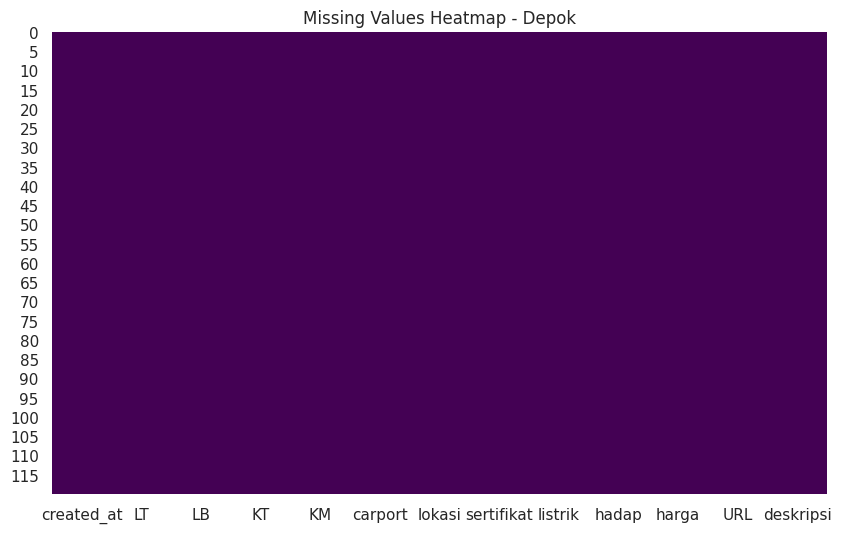

In [129]:
# Visualisasi Missing Value setelah ditangani dengan imputasi
plt.figure(figsize=(10,6))
sns.heatmap(dfD2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Depok')
plt.show()

Terdapat banyak missing value di tiap kota, sehingga kita gunakan metode imputasi yang sesuai untuk masing masing variabel kolom untuk mengisi nilai missing value

##### **Mengubah Tipe Data**

In [130]:
# Mengecek tipe data
dfD2.dtypes

,0
created_at,object
LT,float64
LB,float64
KT,float64
KM,float64
carport,float64
lokasi,object
sertifikat,object
listrik,float64
hadap,object


In [131]:
# Cek jumlah nilai unik untuk semua kolom
for col in dfD2.columns:
    print(f"Kolom: {col}")
    print(f"Jumlah nilai unik: {dfD2[col].nunique()}")
    print(f"Total baris: {len(dfD2)}")
    print("-" * 40)

Kolom: created_at
Jumlah nilai unik: 4
Total baris: 120
----------------------------------------
Kolom: LT
Jumlah nilai unik: 56
Total baris: 120
----------------------------------------
Kolom: LB
Jumlah nilai unik: 49
Total baris: 120
----------------------------------------
Kolom: KT
Jumlah nilai unik: 6
Total baris: 120
----------------------------------------
Kolom: KM
Jumlah nilai unik: 5
Total baris: 120
----------------------------------------
Kolom: carport
Jumlah nilai unik: 7
Total baris: 120
----------------------------------------
Kolom: lokasi
Jumlah nilai unik: 11
Total baris: 120
----------------------------------------
Kolom: sertifikat
Jumlah nilai unik: 2
Total baris: 120
----------------------------------------
Kolom: listrik
Jumlah nilai unik: 9
Total baris: 120
----------------------------------------
Kolom: hadap
Jumlah nilai unik: 6
Total baris: 120
----------------------------------------
Kolom: harga
Jumlah nilai unik: 85
Total baris: 120
----------------------

In [132]:
# Hitung persentase nilai unik untuk kolom object
total_rows = len(dfD2)

print("Persentase nilai unik untuk kolom object:\n")
for col in dfD2.select_dtypes(include='object').columns:
    unique_count = dfD2[col].nunique()
    percent = (unique_count / total_rows) * 100
    print(f"{col:<12} : {unique_count} unik dari {total_rows} baris "
          f"({percent:.1f}%)")

Persentase nilai unik untuk kolom object:

created_at   : 4 unik dari 120 baris (3.3%)
lokasi       : 11 unik dari 120 baris (9.2%)
sertifikat   : 2 unik dari 120 baris (1.7%)
hadap        : 6 unik dari 120 baris (5.0%)
URL          : 119 unik dari 120 baris (99.2%)
deskripsi    : 103 unik dari 120 baris (85.8%)


Berdasarkan persentase nilai unik dari kolom object, kolom yang persentasenya lebih dari 10%, yaitu 'URL' dan 'deskripsi' yang hampir sama persis dengan total baris data, sebaiknya tidak diubah jadi tipe data category karena bisa menghabiskan memory dan tidak efisien

In [133]:
# Mengubah tipe data
dfD2['created_at'] = pd.to_datetime(dfD2['created_at'], format='%d-%m-%Y', errors='coerce')
dfD2['LT'] = dfD2['LT'].astype('int64')
dfD2['LB'] = dfD2['LB'].astype('int64')
dfD2['KT'] = dfD2['KT'].astype('int64')
dfD2['KM'] = dfD2['KM'].astype('int64')
dfD2['carport'] = dfD2['carport'].astype('int64')
dfD2['listrik'] = dfD2['listrik'].astype('int64')
dfD2['harga'] = dfD2['harga'].astype('int64')
dfD2['lokasi'] = dfD2['lokasi'].astype('category')
dfD2['sertifikat'] = dfD2['sertifikat'].astype('category')
dfD2['hadap'] = dfD2['hadap'].astype('category')
dfD2.dtypes

,0
created_at,datetime64[ns]
LT,int64
LB,int64
KT,int64
KM,int64
carport,int64
lokasi,category
sertifikat,category
listrik,int64
hadap,category


Mengubah tipe data dari float ke int supaya nilainya bulat, lebih efisien, dan rapih. Serta mengubah tipe data dari object ke category supaya lebih hemat memori.

##### **Mengubah satuan harga ke rupiah**

Hal ini dilakukan supaya variabel harga akurat, konsisten, dan tidak membingungkan saat dipakai untuk analisis

In [134]:
harga_depok = dfD2[['harga']]
print(harga_depok)

     harga
0     2100
1      250
2      250
3      250
4      350
..     ...
115    195
116    185
117   1750
120   1750
121   1750

[120 rows x 1 columns]


In [135]:
dfD2['harga'] = dfD2['harga'] * 1000000

In [136]:
harga_depok = dfD2[['harga']]
print(harga_depok)

          harga
0    2100000000
1     250000000
2     250000000
3     250000000
4     350000000
..          ...
115   195000000
116   185000000
117  1750000000
120  1750000000
121  1750000000

[120 rows x 1 columns]


In [137]:
# Mengecek data setelah variabel harga diubah ke rupiah
dfD2

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-12-06,165,200,4,2,1,Sukmajaya,SHM,2200,Selatan,2100000000,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,2021-12-06,50,45,2,1,0,Cipayung,SHM,1300,Utara,250000000,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,2021-12-06,50,36,2,1,1,Sawangan,SHM,1300,Barat,250000000,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,2021-12-06,50,45,2,1,0,Cimanggis,SHM,1300,Utara,250000000,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,2021-12-06,72,45,2,1,1,Sawangan,SHM,1300,Timur,350000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-12-04,40,40,2,1,0,Cipayung,SHM,1300,Timur,195000000,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,2021-12-04,50,50,2,1,0,Cipayung,SHM,1300,Selatan,185000000,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
117,2021-12-04,100,15,3,3,1,Cinere,SHM,3500,Utara,1750000000,https://www.rumah123.com/properti/depok/hos928...,Dijual cepat rumah bagus siap huni
120,NaT,72,61,3,2,0,Sawangan,SHM,2200,Utara,1750000000,URL tidak tersedia,Tidak ada deskripsi


##### **Cek noise dan outlier**

In [138]:
# Mengecek noise dengan melihat distribusi dari variabel kategorik
dfD2['lokasi'].value_counts()

,count
lokasi,
Sawangan,32
Cimanggis,25
Tapos,12
Cinere,12
Pancoran Mas,9
Sukmajaya,9
Cipayung,9
Beji,5
Cilodong,3


In [139]:
dfD2['hadap'].value_counts()

,count
hadap,
Utara,77
Barat,15
Timur,15
Selatan,11
Barat Daya,1
Timur Laut,1


In [140]:
dfD2['sertifikat'].value_counts()

,count
sertifikat,
SHM,118
Lainnya,2


In [141]:
dfD2['created_at'].value_counts()

,count
created_at,
2021-12-05,74
2021-12-06,22
2021-12-04,22


In [142]:
dfD2['URL'].value_counts()

,count
URL,
URL tidak tersedia,2
https://www.rumah123.com/properti/depok/hos9287973/,1
https://www.rumah123.com/properti/depok/hos9287804/,1
https://www.rumah123.com/properti/depok/hos9287931/,1
https://www.rumah123.com/properti/depok/hos9287917/,1
...,...
https://www.rumah123.com/properti/depok/hos9282169/,1
https://www.rumah123.com/properti/depok/hos9281989/,1
https://www.rumah123.com/properti/depok/hos9282087/,1


In [143]:
dfD2['deskripsi'].value_counts()

,count
deskripsi,
Rumah Cluster Siap Huni Depok,4
Rumah Murah Dekat Stasiun dan Tol di Depok Sawangan.,4
Rumah 2 Lantai 2 Bangunan Gaya Art Deco di Kota Mandiri Baru,4
CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK,3
Rumah 2 Lantai Alexandria Premiere Pinggir Jalan Di Cimanggis Tapos Depok,3
...,...
DIJUAL KONTRAKAN 2 PINTU FULL TERISI YG NGONTRAK MASUK MOBIL,1
PERUMAHAN NUANSA PERMAI DEPOK,1
rumah semi minimalis manis harga ekonomis di citayam #RumahMurah,1


Batas bawah: -576250000.0
Batas atas: 2253750000.0

Outliers:
0      True
1      True
2      True
3      True
4      True
       ... 
115    True
116    True
117    True
120    True
121    True
Name: harga, Length: 120, dtype: bool


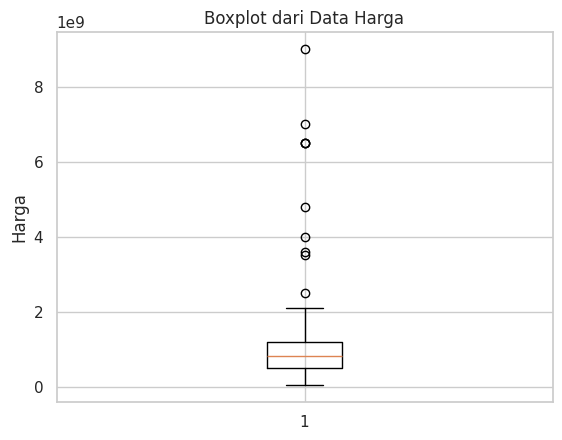

In [144]:
#  Mengecek outlier dengan melihat distribusi dari variabel kontinu
# Menghitung Q1 dan Q3 untuk mencari nilai IQR (IQR adalah ukuran sebaran data tengah, dan dipakai untuk deteksi outlier supaya lebih robust (tahan terhadap data ekstrem))
Q1 = dfD2['harga'].quantile(0.25) # Kuartil bawah
Q3 = dfD2['harga'].quantile(0.75) # Kuartil atas
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5* IQR

bukan_outlier = (dfD2["harga"] >= batas_bawah) & (dfD2["harga"] <= batas_atas)

# Buat DataFrame tanpa outlier
dfD2_bukan_outlier = dfD2[bukan_outlier]

# Buat DataFrame dengan outlier
dfD2_outlier = dfD2[~bukan_outlier]

# Menampilkan hasil
print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)
print("\nOutliers:")
print(bukan_outlier)

# Membuat boxplot
plt.boxplot(dfD2['harga'])
plt.title("Boxplot dari Data Harga")
plt.ylabel("Harga")
plt.show()

In [145]:
# DataFrame tanpa outlier
dfD2_bukan_outlier

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-12-06,165,200,4,2,1,Sukmajaya,SHM,2200,Selatan,2100000000,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,2021-12-06,50,45,2,1,0,Cipayung,SHM,1300,Utara,250000000,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,2021-12-06,50,36,2,1,1,Sawangan,SHM,1300,Barat,250000000,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,2021-12-06,50,45,2,1,0,Cimanggis,SHM,1300,Utara,250000000,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,2021-12-06,72,45,2,1,1,Sawangan,SHM,1300,Timur,350000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-12-04,40,40,2,1,0,Cipayung,SHM,1300,Timur,195000000,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,2021-12-04,50,50,2,1,0,Cipayung,SHM,1300,Selatan,185000000,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
117,2021-12-04,100,15,3,3,1,Cinere,SHM,3500,Utara,1750000000,https://www.rumah123.com/properti/depok/hos928...,Dijual cepat rumah bagus siap huni
120,NaT,72,61,3,2,0,Sawangan,SHM,2200,Utara,1750000000,URL tidak tersedia,Tidak ada deskripsi


In [146]:
# DataFrame dengan outlier
dfD2_outlier

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
23,2021-12-05,487,450,6,3,5,Pancoran Mas,SHM,2200,Utara,4000000000,https://www.rumah123.com/properti/depok/hos928...,Beli Rumah Bonus Ruko & Kontrakan di Pesona Ka...
24,2021-12-05,378,289,4,4,3,Sukmajaya,SHM,5500,Timur Laut,7000000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah di Pesona Khayangan Mungil Dekat U...
25,2021-12-05,400,226,5,4,1,Cinere,SHM,2200,Selatan,3600000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah Full Furnish Marmer di Megapolitan...
28,2021-12-05,1024,400,7,5,6,Limo,SHM,4400,Utara,6500000000,https://www.rumah123.com/properti/depok/hos928...,Rumah plus paviliun dengan taman luas selangka...
29,2021-12-05,1024,400,7,5,6,Cinere,SHM,5500,Utara,6500000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah Tanah Luas Siap Huni Lingkungan Se...
32,2021-12-05,151,180,3,3,1,Pancoran Mas,SHM,2200,Selatan,3500000000,https://www.rumah123.com/properti/depok/hos928...,Rumah 2 Lantai di Pesona Kayangan Margonda Depok
33,2021-12-05,885,600,7,4,2,Cimanggis,SHM,6600,Utara,6500000000,https://www.rumah123.com/properti/depok/hos928...,"Rumah luas tanah besar, kolam renang dan taman..."
38,2021-12-05,249,260,3,2,0,Bojong Sari,Lainnya,2200,Utara,2500000000,https://www.rumah123.com/properti/depok/hos924...,Rumah bagus daerah reni jaya depok
103,2021-12-04,880,400,5,1,7,Cinere,SHM,3300,Selatan,9000000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Halaman Luas Pondok Labu Cocok Untuk Min...
105,2021-12-04,335,300,4,3,2,Cinere,SHM,10000,Utara,4800000000,https://www.rumah123.com/properti/depok/hos928...,Rumah megah komplek elite cinere segera survey...


# **BOGOR**

In [147]:
#Bogor
dfB.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,Barat,6.925500e+08,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,8.114000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,9.005000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,1.001900e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,NaN,1.200800e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...


In [148]:
dfB.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


In [149]:
dfB['lokasi'].value_counts()

,count
lokasi,
Gunung Putri,26
Babakan Madang,25
Parung,20
Bogor Barat,16
Bojonggede,12
Cibinong,12
Cileungsi,11
Bogor Utara,11
Jonggol,7


# **TANGERANG**

## **Membaca Data**

In [150]:
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Kota Tangerang terdiri dari 128 baris dan 26 kolom

In [151]:
# Mengecek kolom yang tersedia dari data
dfT.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [152]:
# Mengecek 10 baris pertama dari data
print("\n10 baris Pertama dari Data Kota Tangerang:")
dfT.head(10)


10 baris Pertama dari Data Kota Tangerang:


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,12-06-2021,60.0,36.0,2.0,1.0,NaN,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12-06-2021,37.0,72.0,2.0,1.0,1.0,1.0,"MAUK, TANGERANG",HGB,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12-06-2021,72.0,45.0,2.0,1.0,1.0,1.0,"SEPATAN, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12-06-2021,151.0,120.0,2.0,2.0,1.0,1.0,"CIKUPA CITRA JAYA, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,12-06-2021,160.0,160.0,3.0,2.0,NaN,NaN,"CIKUPA CITRA JAYA, TANGERANG",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# Mengecek 10 baris terakhir dari data
dfT.tail(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
118,12-08-2021,300.0,148.0,4.0,3.0,2.0,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
# Mengecek informasi data Kota Tangerang
dfT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   124 non-null    object 
 1   LT           124 non-null    float64
 2   LB           124 non-null    float64
 3   KT           124 non-null    float64
 4   KM           124 non-null    float64
 5   garasi       38 non-null     float64
 6   carport      92 non-null     float64
 7   lokasi       124 non-null    object 
 8   sertifikat   122 non-null    object 
 9   listrik      111 non-null    float64
 10  hadap        49 non-null     object 
 11  harga        124 non-null    float64
 12  URL          124 non-null    object 
 13  deskripsi    124 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

## **Preprocessing**

Dari data diatas, dapat dilihat bahwa ada banyak baris dan kolom yang tidak berisi informasi apapun. Sehingga, perlu dilakukan preprocessing supaya data lebih bersih, konsisten, dan siap untuk di pakai.

#### **Menghapus Variabel**

In [155]:
# Menghapus baris kosong yang tidak memuat informasi apapun
dfT.dropna(how = "all", inplace = True)

In [156]:
# Menghapus kolom kosong yang tidak memuat informasi apapun
dfT.dropna(how = "all", axis = 1, inplace = True)

In [157]:
# Mengecek data Kota Tangerang setelah penghapusan baris dan kolom yang kosong
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


Setelah dilakukan penghapusan variabel pada baris dan kolom yang tidak memuat informasi apapun. Maka jumlah baris dan kolom yang tersisa adalah 124 baris dan 14 kolom.

In [158]:
# Mengecek nilai unik dari setiap kolom
for col in dfT.columns:
    print(f"Kolom: {col}")
    print(dfT[col].unique())
    print("-" * 50)

Kolom: created_at
['12-06-2021' '12-07-2021' '12-08-2021']
--------------------------------------------------
Kolom: LT
[  60.   72.  200.   76.   37.  151.  160.  180.   78.  119.   90.  250.
  144.   96.  276.  224.  216.  189.  265.  162.   84.  155.  534.  128.
  105.  205.  295.  385.  184.  320.  625.  300.  474.   98.  335.  241.
  234.   77.  150.   93.  315.  202.   48.   99.  170.  230.   94.  136.
   50.  240.  113.  375.  373.  365. 3087.  308.  288.  112.  153.   66.
  118.  108.   91.]
--------------------------------------------------
Kolom: LB
[  50.   54.   48.  225.  123.   36.   72.   45.  120.  160.  130.   40.
  119.  360.  117.   75.  441.  184.  108.  140.  100.  180.  125.   85.
 1000.   88.  298.  138.  272.   90.  380.  105.  500.  255.  153.  110.
   70.  220.  240.  250.  300.  200.   93.  136.   62.  150.  370.   60.
   82.   66.   52.   27.  190.   80.   29.   89.  400.  350.  142.  450.
  155. 2500.  492.  375.   92.   37.  148.   55.   91.]
-------------

#### **Cek Duplikat**

In [159]:
# Mengecek total duplikat yang ada dari data
dfT.duplicated().sum()

np.int64(0)

Setelah dilakukan pengecekan duplikat, dapat terlihat bahwa tidak terdapat duplikat dalam data.

#### **Cek Missing Value**

In [160]:
# Mengecek missing value
print("\nCek Missing Values di Data Kota Tangerang:")
dfT.isnull().sum()


Cek Missing Values di Data Kota Tangerang:


,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,86
carport,32
lokasi,0
sertifikat,2
listrik,13


In [161]:
# Persentase Missing Value
(dfT.isnull().sum()/len(dfT)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,0.000000
LT,0.000000
LB,0.000000
KT,0.000000
KM,0.000000
garasi,69.354839
carport,25.806452
lokasi,0.000000
sertifikat,1.612903
listrik,10.483871


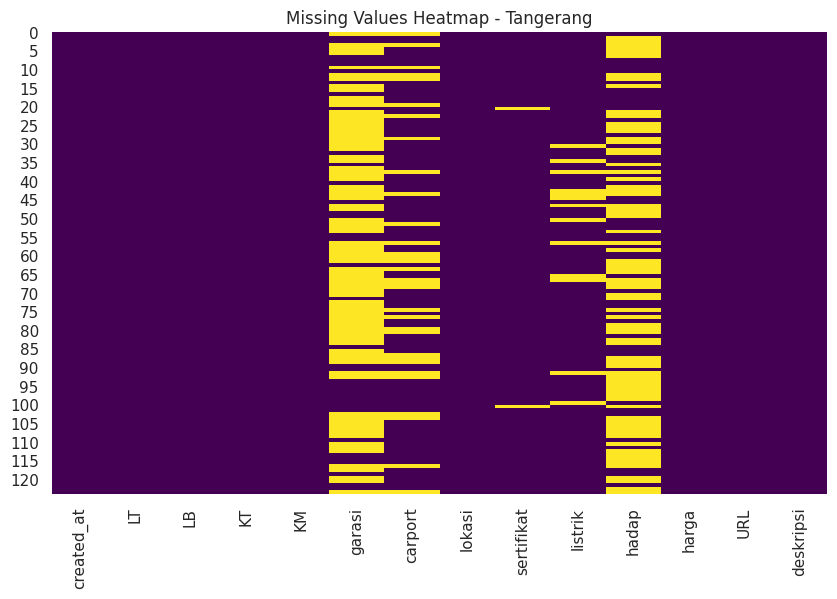

In [162]:
# Visualisasi Missing Value
plt.figure(figsize=(10,6))
sns.heatmap(dfT.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Tangerang')
plt.show()

In [163]:
# Hapus kolom 'garasi' karena terlalu banyak missing (persentasi > 50%)
dfT2 = dfT.drop(columns=['garasi', 'hadap'])

In [164]:
# CEK DATA SETELAH KOLOM GARASI DAN HADAP DIHAPUS
dfT2.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'carport', 'lokasi', 'sertifikat',
       'listrik', 'harga', 'URL', 'deskripsi'],
      dtype='object')

In [165]:
# MENGECEK SKEWNESS UNTUK MENENTUKAN IMPUTASI
print("Daya Listrik:", dfT2['listrik'].skew())

Daya Listrik: 7.510939660508678


Dari hasil tersebut dan berdasarkan aturan umum skewness maka:
- Nilai skewness < -1 atau sangat miring ke kiri maka gunakan median
- -1 ≤ nilai skewness ≤ 1 atau relatif simetris maka gunakan mean/median (sama saja) median lebih tahan kalau ada outlier
- Nilai skewness > 1 atau sangat miring ke kanan maka gunakan median (lebih tahan outlier)

In [166]:
# 1. Mengisi missing values untuk kolom numerik
dfT2['carport'].fillna(0, inplace=True)  # Mengisi dengan 0 jika tidak ada carport
dfT2['listrik'].fillna(dfT2['listrik'].median(), inplace=True)  # Daya listrik

# Mengisi Missing Value dengan modus
dfT2['sertifikat'].fillna(dfT2['sertifikat'].mode()[0], inplace=True)

# Tampilkan DataFrame setelah mengisi missing values
print(dfT2)

     created_at     LT     LB   KT   KM  carport                     lokasi  \
0    12-06-2021   60.0   50.0  3.0  2.0      0.0        BSD CITY, TANGERANG   
1    12-06-2021   72.0   54.0  2.0  1.0      1.0          CISAUK, TANGERANG   
2    12-06-2021   60.0   48.0  3.0  2.0      2.0         CILEDUG, TANGERANG   
3    12-06-2021  200.0  225.0  5.0  4.0      0.0  LIPPO KARAWACI, TANGERANG   
4    12-06-2021   76.0  123.0  3.0  3.0      2.0     PONDOK CABE, TANGERANG   
..          ...    ...    ...  ...  ...      ...                        ...   
119  12-08-2021   60.0   55.0  2.0  2.0      1.0  LIPPO KARAWACI, TANGERANG   
120  12-08-2021   66.0   70.0  3.0  2.0      1.0          Ciater, Tangerang   
121  12-08-2021  202.0   85.0  4.0  3.0      1.0  BSD Griya Loka, Tangerang   
122  12-08-2021  108.0  130.0  3.0  3.0      1.0      Pagedangan, Tangerang   
123  12-08-2021   91.0   91.0  3.0  2.0      0.0           Poris, Tangerang   

                          sertifikat  listrik   har

In [167]:
# Cek Missing Value
print("\nCek Missing Values di Data Tangerang:")
dfT2.isnull().sum()


Cek Missing Values di Data Tangerang:


,0
created_at,0
LT,0
LB,0
KT,0
KM,0
carport,0
lokasi,0
sertifikat,0
listrik,0
harga,0


#### **Mengubah Tipe Data**

In [168]:
dfT2.dtypes

,0
created_at,object
LT,float64
LB,float64
KT,float64
KM,float64
carport,float64
lokasi,object
sertifikat,object
listrik,float64
harga,float64


In [169]:
# Ubah tipe data
dfT2['created_at'] = pd.to_datetime(dfT2['created_at'], format='%d-%m-%Y')
dfT2['lokasi'] = dfT2['lokasi'].astype('category')
dfT2['sertifikat'] = dfT2['sertifikat'].astype('category')
dfT2['LT'] = dfT2['LT'].astype('int')
dfT2['LB'] = dfT2['LB'].astype('int')
dfT2['KM'] = dfT2['KM'].astype('int')
dfT2['KT'] = dfT2['KT'].astype('int')
dfT2['carport'] = dfT2['carport'].astype('int')
dfT2['listrik'] = dfT2['listrik'].astype('int')
dfT2['harga'] = dfT2['harga'].astype('int')

In [170]:
dfT2.dtypes

,0
created_at,datetime64[ns]
LT,int64
LB,int64
KT,int64
KM,int64
carport,int64
lokasi,category
sertifikat,category
listrik,int64
harga,int64


#### **Mengubah Satuan Harga**

In [171]:
harga_tangerang = dfT2[['harga']]
print(harga_tangerang)

     harga
0      500
1      480
2      600
3     4250
4     1700
..     ...
119    711
120    850
121   1860
122   1800
123   1000

[124 rows x 1 columns]


In [172]:
dfT['harga'] = dfT['harga'] * 1000000

In [173]:
harga_tangerang = dfT[['harga']]
print(harga_tangerang)

            harga
0    5.000000e+08
1    4.800000e+08
2    6.000000e+08
3    4.250000e+09
4    1.700000e+09
..            ...
119  7.110000e+08
120  8.500000e+08
121  1.860000e+09
122  1.800000e+09
123  1.000000e+09

[124 rows x 1 columns]


In [174]:
dfT2

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-06-12,60,50,3,2,0,"BSD CITY, TANGERANG",SHM,1300,500,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,2021-06-12,72,54,2,1,1,"CISAUK, TANGERANG",SHM,1300,480,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,2021-06-12,60,48,3,2,2,"CILEDUG, TANGERANG",SHM,2200,600,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,2021-06-12,200,225,5,4,0,"LIPPO KARAWACI, TANGERANG",SHM,5500,4250,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,2021-06-12,76,123,3,3,2,"PONDOK CABE, TANGERANG",SHM,2200,1700,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...
119,2021-08-12,60,55,2,2,1,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200,711,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,2021-08-12,66,70,3,2,1,"Ciater, Tangerang",SHM,1300,850,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,2021-08-12,202,85,4,3,1,"BSD Griya Loka, Tangerang",SHM,2200,1860,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,2021-08-12,108,130,3,3,1,"Pagedangan, Tangerang",SHM,2200,1800,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


#### **Noise dan Outlier**

In [175]:
# Mengecek noise dengan melihat distribusi dari data kategorik
dfT2['lokasi'].value_counts()

,count
lokasi,
"BSD, TANGERANG",27
"BSD CITY, TANGERANG",21
"CISAUK, TANGERANG",8
"GADING SERPONG, TANGERANG",8
"BSD THE ICON, TANGERANG",6
"CIKUPA CITRA JAYA, TANGERANG",3
"LIPPO KARAWACI, TANGERANG",3
"CILEDUG, TANGERANG",3
"CIPONDOH, TANGERANG",3


In [176]:
dfT2['sertifikat'].value_counts()

,count
sertifikat,
SHM,98
"lainnya(PPJB, GIRIK, ADAT, dll)",15
HGB,11


In [177]:
# Mengecek noise
dfT2['created_at'].value_counts()

,count
created_at,
2021-06-12,102
2021-08-12,12
2021-07-12,10


In [178]:
dfT2['URL'].value_counts()

,count
URL,
https://www.rumah123.com/properti/tangerang/hos9276294/,1
https://www.rumah123.com/properti/tangerang/hos2510851/,1
https://www.rumah123.com/properti/tangerang/hos9292316/,1
https://www.rumah123.com/properti/tangerang/hos8607319/,1
https://www.rumah123.com/properti/tangerang/hos9292695/,1
...,...
https://www.rumah123.com/properti/tangerang/hos9300596/,1
https://www.rumah123.com/properti/tangerang/hos9300548/,1
https://www.rumah123.com/properti/tangerang/hos9300043/,1


In [179]:
dfT2['deskripsi'].value_counts()

,count
deskripsi,
"Dekat dengan berbagai fasilitas seperti :\nSekolah Negeri dan Swasta, Kampus, Tempat ibadah, Rumah sakit, Pusat perbelanjaan, Stasiun, Pintu tol\nMore info :\n0821 3494 3xxx RN\n0821 1238 5xxx LH",8
"Dekat dengan berbagai fasilitas seperti : Sekolah Negeri dan Swasta, Kampus, Tempat ibadah, Rumah sakit, Pusat perbelanjaan, Stasiun, Pintu tol. More info : 0821 3494 3xxx RN, 0821 1238 5xxx LH",6
"Hi Direct Buyer...\nDijual Rumah The Icon BSD City\nSpesifikasi: Lt 128 m2 ( 8 x 18 ), Lb 88 m2, Kt 3+1, Km 3+1, Posisi Badan, Hadap Selatan, Surat PPJB, Harga 2.2M Nego\n",2
"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARAWACI CENTRAL CLUSTER TAMAN BROMO memiliki kolam renang, memiliki 2 Lantai, AC 7 unit",1
"diapit oleh 3 tol besar, JOR 2, Cinere-Jagorawi, dan Cinere-Serpong. Berlokasi kurang dari 5 menit dengan Lapangan terbang Pondok Cabe, 10 menit ke TransJakarta feedeer,\ndan 20 menit ke MRT Lebak Bulus",1
...,...
"Lokasi sangat dekat dengan berbagai Akses,Tersedia berbagai Fasilitas",1
"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asri, Free Bphtb, AJB, Balik Nama & Biaya Notaris.",1
"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital, Ora et Labora, Pasar Modern BSD, Tol Jkt-Serpong, Sekolah Cikal, Sekolah Stella Maris, Sekolah Saint John, Sekolah Jakarta Nanyang School,Sekolah Binus Serpong",1


Batas bawah: -3068.75
Batas atas: 7881.25

Outliers:
0      False
1      False
2      False
3      False
4      False
       ...  
119    False
120    False
121    False
122    False
123    False
Name: harga, Length: 124, dtype: bool


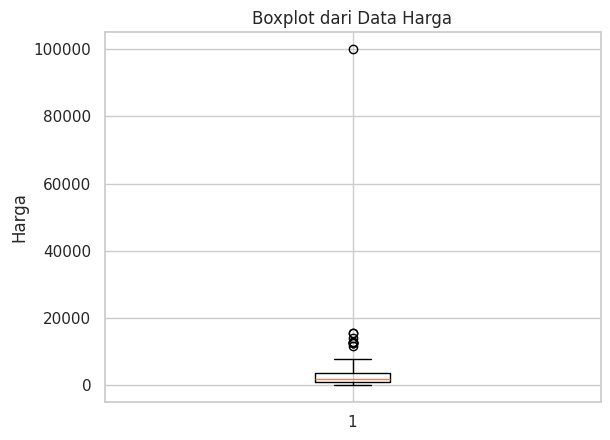

In [180]:
#  Mengecek outlier dengan melihat distribusi dari variabel kontinu
# Menghitung Q1 dan Q3
Q1 = dfT2['harga'].quantile(0.25)
Q3 = dfT2['harga'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5* IQR

bukan_outlier = (dfT2["harga"] >= Q1 - 1.5 * IQR) & (dfT["harga"] <= Q3 + 1.5*IQR)

# BUat DataFrame tanpa outlier
dfT2_bukan_outlier = dfT2[bukan_outlier]

# Creating DataFrame With Outliers
dfT2_outlier = dfT2[~bukan_outlier]

# Menampilkan hasil
print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)
print("\nOutliers:")
print(bukan_outlier)

# Membuat boxplot
plt.boxplot(dfT2['harga'])
plt.title("Boxplot dari Data Harga")
plt.ylabel("Harga")
plt.show()

In [181]:
dfT2_bukan_outlier

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi


In [182]:
dfT2_outlier

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-06-12,60,50,3,2,0,"BSD CITY, TANGERANG",SHM,1300,500,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,2021-06-12,72,54,2,1,1,"CISAUK, TANGERANG",SHM,1300,480,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,2021-06-12,60,48,3,2,2,"CILEDUG, TANGERANG",SHM,2200,600,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,2021-06-12,200,225,5,4,0,"LIPPO KARAWACI, TANGERANG",SHM,5500,4250,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,2021-06-12,76,123,3,3,2,"PONDOK CABE, TANGERANG",SHM,2200,1700,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...
119,2021-08-12,60,55,2,2,1,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200,711,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,2021-08-12,66,70,3,2,1,"Ciater, Tangerang",SHM,1300,850,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,2021-08-12,202,85,4,3,1,"BSD Griya Loka, Tangerang",SHM,2200,1860,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,2021-08-12,108,130,3,3,1,"Pagedangan, Tangerang",SHM,2200,1800,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


# **BEKASI**

# **CEK DATA**

In [183]:
#Bekasi
dfX

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


data bekasi ini terdapat 992 baris dan 26 kolom

In [184]:
# CEK 10 BARIS PERTAMA DARI DATA KOTA BEKASI
print("\n10 baris Pertama dari Data Kota Bekasi:")
dfX.head(10)


10 baris Pertama dari Data Kota Bekasi:


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,08-12-2021,160.0,230.0,4.0,4.0,1.0,NaN,Kabupaten Bekasi,SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,08-12-2021,144.0,157.0,3.0,3.0,NaN,1.0,Kabupaten Bekasi,HGB,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,07-12-2021,336.0,200.0,4.0,3.0,NaN,1.0,Kabupaten Bekasi,HGB,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,07-12-2021,119.0,170.0,5.0,3.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,06-12-2021,102.0,132.0,3.0,2.0,NaN,1.0,Kota Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
# CEK 10 BARIS TERAKHIR DARI DATA KOTA BEKASI
print("\n10 baris terakhir dari Data Kota Bekasi:")
dfX.tail(10)


10 baris terakhir dari Data Kota Bekasi:


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
# CEK DATA BEKASI
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   107 non-null    object 
 1   LT           107 non-null    float64
 2   LB           107 non-null    float64
 3   KT           107 non-null    float64
 4   KM           106 non-null    float64
 5   garasi       33 non-null     float64
 6   carport      81 non-null     float64
 7   lokasi       107 non-null    object 
 8   sertifikat   106 non-null    object 
 9   listrik      101 non-null    float64
 10  hadap        48 non-null     object 
 11  harga        107 non-null    float64
 12  URL          107 non-null    object 
 13  deskripsi    107 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [187]:
# CEK JUMLAH NILAI UNIQ TIAP KOLOM
dfX.nunique()

,0
created_at,8
LT,49
LB,53
KT,7
KM,4
garasi,2
carport,2
lokasi,2
sertifikat,3
listrik,7


# **PREPROCESSING**

pada data terlihat banyak baris dan kolom yang tidak berisi informasi apapun, kita bisa menghapus baris dan kolom tersebut karena tidak diperlukan

In [188]:
# MEMBUANG BARIS KOSONG YANG TIDAK MEMUAT INFORMASI APAPUN
dfX.dropna(how = "all", inplace = True)

In [189]:
# MEMBUANG KOLOM KOSONG YANG TIDAK MEMUAT INFORMASI APAPUN
dfX.dropna(how = "all", axis = 1, inplace = True)

In [190]:
# CEK DATA BEKASI SETELAH PENGHAPUSAN BARIS DAN KOLOM YANG KOSONG
dfX

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,01-12-2021,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1.600000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,01-12-2021,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,01-12-2021,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,Timur,3.000000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."


setelah baris dan kolom kosong dihapus jumlah baris yang tadinya 992 baris menjadi 107 baris, dan kolom yang tadinya 26 kolom, menjadi 14 kolom

In [191]:
# CEK NILAI UNIK DARI SETIAP KOLOM
for col in dfX.columns:
    print(f"Kolom: {col}")
    print(dfX[col].unique())
    print("Jumlah nilai unik:", dfX[col].nunique())
    print("-" * 50)

Kolom: created_at
['08-12-2021' '07-12-2021' '06-12-2021' '05-12-2021' '04-12-2021'
 '03-12-2021' '02-12-2021' '01-12-2021']
Jumlah nilai unik: 8
--------------------------------------------------
Kolom: LT
[ 71.  59. 124. 144. 108. 160. 336. 119. 102.  85.  72.  60.  84.  77.
 245. 296. 200.  94.  66.  88.  97.  78.  91. 110. 153.  54.  90.  63.
 112. 100. 117. 101. 135. 150. 105. 143. 126.  96. 145. 364.  65.  75.
  81.  50. 156. 320. 180. 140.  36.]
Jumlah nilai unik: 49
--------------------------------------------------
Kolom: LB
[ 43.  60.  95. 100. 230. 157. 200. 170. 132.  68.  50.  63. 168. 117.
 250.  55.  40. 145.  75. 144.  90. 140.  45. 135. 293. 180. 102.  84.
  80.  36. 120.  72. 112.  66. 110.  70. 141. 119.  85. 143.  32. 130.
  69.  96. 494.  53.  30. 160. 105. 150. 300.  47. 220.]
Jumlah nilai unik: 53
--------------------------------------------------
Kolom: KT
[2. 3. 4. 5. 6. 1. 7.]
Jumlah nilai unik: 7
--------------------------------------------------
Kolom: KM
[ 

### **CEK DUPLIKASI PADA DATA BEKASI**

In [192]:
# CEK DUPLIKAT PADA DATA BEKASI
dfX.duplicated().sum()

np.int64(0)

### **CEK MISSING VALUE PADA DATA BEKASI**

In [193]:
# CEK MISSING VALUE PADA DATA BEKASI
print("\nCek Missing Values pada data Kota Bekasi:")
dfX.isnull().sum()


Cek Missing Values pada data Kota Bekasi:


,0
created_at,0
LT,0
LB,0
KT,0
KM,1
garasi,74
carport,26
lokasi,0
sertifikat,1
listrik,6


In [194]:
# PERSENTASE MISSING VALUE DATA BEKASI
(dfX.isnull().sum()/len(dfX)*100).to_frame('Persentase Missing Value Data Bekasi')

,Persentase Missing Value Data Bekasi
created_at,0.000000
LT,0.000000
LB,0.000000
KT,0.000000
KM,0.934579
garasi,69.158879
carport,24.299065
lokasi,0.000000
sertifikat,0.934579
listrik,5.607477


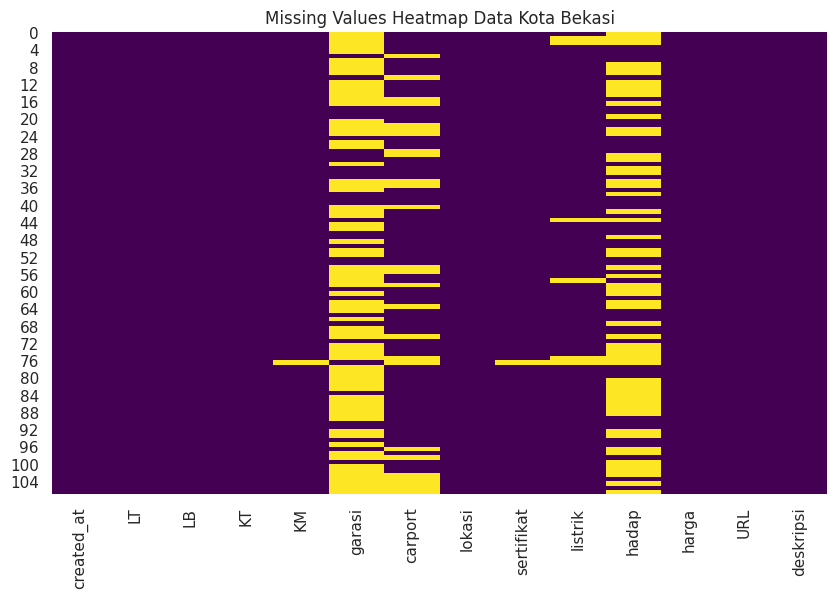

In [195]:
# Visualisasi Missing Value
plt.figure(figsize=(10,6))
sns.heatmap(dfX.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap Data Kota Bekasi')
plt.show()

Pada pengecekan missing value kita bisa pertimbangkan penanganan missing value pada setiap kolomnya
1. created_at, LT, LB, KT, lokasi, harga, URL, deskripsi (0%) ➝ Tidak ada missing value → tetap dipakai tanpa perubahan.
2. KM (0,93%) ➝ persentase mv sangat kecil, bisa dilakukan imputasi
3. sertifikat (0,93)% ➝ persentase mv sangat kecil, bisa dilakukan imputasi
4. garasi (69,15%) ➝ Missing sangat tinggi (>60%), kalau dipertahankan, hasil analisis jadi bias. kolom ini hampir useless, dan missing terlalu banyak. rekomendasi penanganan missing value dengan menghapus kolom garasi
5. carport (24,29%) ➝ missing value masih dibawah 30% walaupun missingnya terbilang cukup besar, dipertimbangkan penanganan menggunakan imputasi
6. listrik (5,60%) ➝ Missing rendah (<10%). penanganan missing value dapat dilakukan dengan imputasi
7. hadap (55,14%) ➝ Missing sangat tinggi (>50%), Lebih dari separuh kosong, nilainya kategori (Utara, Selatan, Barat, dsb). Tidak krusial untuk pricing (lebih ke preferensi kecil). rekomendasi penanganan missing value dengan menghapus kolom hadap

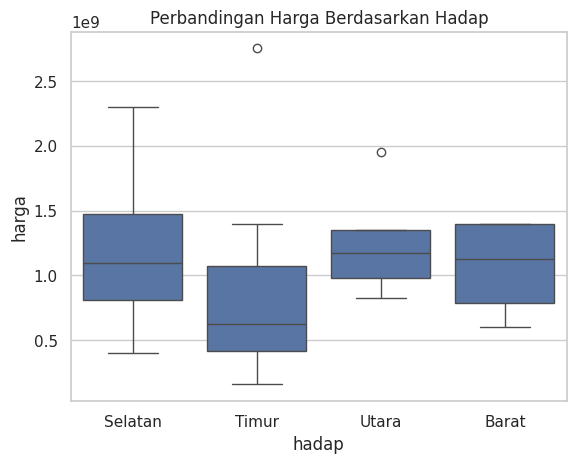

In [196]:
# Pertimbangan untuk menghapus kolom hadap
sns.boxplot(x="hadap", y="harga", data=dfX)
plt.title("Perbandingan Harga Berdasarkan Hadap")
plt.show()

Dari hasil visualisasi boxplot, harga rumah di Bekasi tidak menunjukkan perbedaan yang signifikan berdasarkan arah hadap. Dengan proporsi missing value yang tinggi (55%), variabel hadap diputuskan untuk dihapus agar analisis tetap fokus pada faktor yang lebih relevan seperti luas tanah, luas bangunan, jumlah kamar, sertifikat, dan lokasi.

In [197]:
# HAPUS KOLOM GARASI DAN HADAP KARENA TERLALU BANYAK MISSING VALUE (PERSENTASE > 50%)
dfX2 = dfX.drop(columns=['garasi', 'hadap'])

In [198]:
# CEK DATA SETELAH KOLOM GARASI DAN HADAP DIHAPUS
dfX2.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'carport', 'lokasi', 'sertifikat',
       'listrik', 'harga', 'URL', 'deskripsi'],
      dtype='object')

sekarang kolom ada 12 setelah penghapusan kolom garasi dan hadap

In [199]:
# MENGECEK SKEWNESS UNTUK MENENTUKAN IMPUTASI PENANGANAN MISSING VALUE KOLOM NUMERIK
print("Kamar Mandi:", dfX2['KM'].skew())
print("Daya Listrik:", dfX2['listrik'].skew())

Kamar Mandi: 0.4898485571687122
Daya Listrik: 2.0785448149577164


Dari hasil tersebut dan berdasarkan aturan umum skewness maka:

- Nilai skewness < -1 atau sangat miring ke kiri maka gunakan median
- -1 ≤ nilai skewness ≤ 1 atau relatif simetris maka gunakan mean/median (sama saja) median lebih tahan kalau ada outlier
- Nilai skewness > 1 atau sangat miring ke kanan maka gunakan median (lebih tahan outlier)

In [200]:
# 1. MENGISI MISSING VALUE UNTUK KOLOM NUMERIK
dfX2['KM'].fillna(dfX2['KM'].median(), inplace=True)  # Jumlah Kamar Mandi
dfX2['listrik'].fillna(dfX2['listrik'].median(), inplace=True)  # Daya listrik
dfX2['carport'].fillna(0, inplace=True)  # Mengisi dengan 0 jika tidak ada carport

# 2 MENGISI MISSING VALUE DENGAN MODUS UNTUK KOLOM CATEGORY (OBJECT)
dfX2['sertifikat'].fillna(dfX2['sertifikat'].mode()[0], inplace=True)

# TAMPILKAN DATA BEKASI SETELAH MENGISI MISSING VALUE
print(dfX2)

     created_at     LT     LB   KT   KM  carport            lokasi sertifikat  \
0    08-12-2021   71.0   43.0  2.0  1.0      1.0  Kabupaten Bekasi        SHM   
1    08-12-2021   59.0   60.0  2.0  1.0      1.0  Kabupaten Bekasi        SHM   
2    08-12-2021  124.0   95.0  2.0  1.0      1.0  Kabupaten Bekasi        SHM   
3    08-12-2021  144.0  100.0  2.0  1.0      1.0  Kabupaten Bekasi        SHM   
4    08-12-2021  108.0  100.0  3.0  2.0      1.0  Kabupaten Bekasi        SHM   
..          ...    ...    ...  ...  ...      ...               ...        ...   
102  01-12-2021  180.0  220.0  5.0  3.0      0.0       Kota Bekasi        SHM   
103  01-12-2021  140.0  250.0  3.0  2.0      0.0  Kabupaten Bekasi        SHM   
104  01-12-2021   60.0   55.0  2.0  1.0      0.0  Kabupaten Bekasi        SHM   
105  01-12-2021   36.0   60.0  2.0  1.0      0.0  Kabupaten Bekasi        SHM   
106  01-12-2021   60.0   55.0  2.0  1.0      0.0  Kabupaten Bekasi        SHM   

     listrik         harga 

In [201]:
# CEK MISSING VALUE SETELAH DITANGANI PADA DATA BEKASI
print("\nCek Missing Values di Data Bekasi:")
dfX2.isnull().sum()


Cek Missing Values di Data Bekasi:


,0
created_at,0
LT,0
LB,0
KT,0
KM,0
carport,0
lokasi,0
sertifikat,0
listrik,0
harga,0


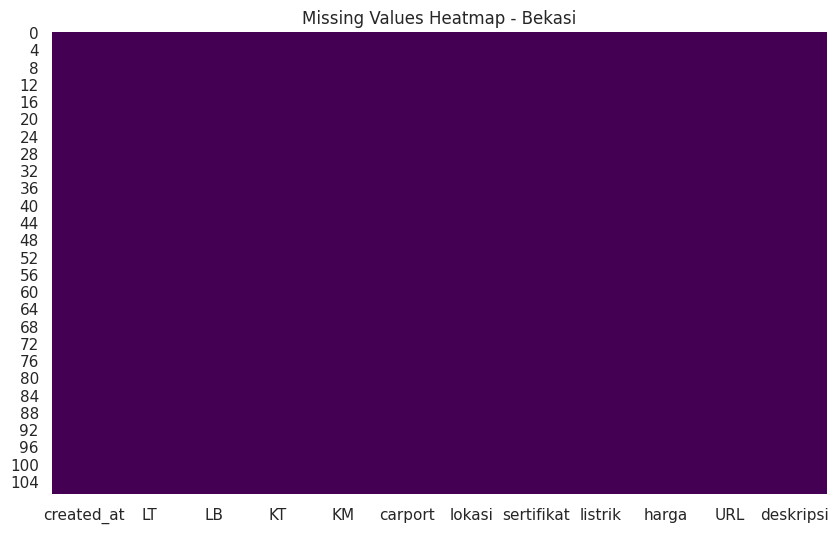

In [202]:
# Visualisasi setelah Missing Value ditangani
plt.figure(figsize=(10,6))
sns.heatmap(dfX2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Bekasi')
plt.show()

data sudah bersih dari missing value

### **MENGUBAH TIPE DATA**

In [203]:
# CEK TIPE DATA
dfX2.dtypes

,0
created_at,object
LT,float64
LB,float64
KT,float64
KM,float64
carport,float64
lokasi,object
sertifikat,object
listrik,float64
harga,float64


In [204]:
# CEK JUMLAH NILAI UNIK UNTUK SEMUA KOLOM
for col in dfX2.columns:
    print(f"Kolom: {col}")
    print(f"Jumlah nilai unik: {dfX2[col].nunique()}")
    print(f"Total baris: {len(dfX2)}")
    print("-" * 40)

Kolom: created_at
Jumlah nilai unik: 8
Total baris: 107
----------------------------------------
Kolom: LT
Jumlah nilai unik: 49
Total baris: 107
----------------------------------------
Kolom: LB
Jumlah nilai unik: 53
Total baris: 107
----------------------------------------
Kolom: KT
Jumlah nilai unik: 7
Total baris: 107
----------------------------------------
Kolom: KM
Jumlah nilai unik: 4
Total baris: 107
----------------------------------------
Kolom: carport
Jumlah nilai unik: 3
Total baris: 107
----------------------------------------
Kolom: lokasi
Jumlah nilai unik: 2
Total baris: 107
----------------------------------------
Kolom: sertifikat
Jumlah nilai unik: 3
Total baris: 107
----------------------------------------
Kolom: listrik
Jumlah nilai unik: 7
Total baris: 107
----------------------------------------
Kolom: harga
Jumlah nilai unik: 74
Total baris: 107
----------------------------------------
Kolom: URL
Jumlah nilai unik: 104
Total baris: 107
-----------------------

In [205]:
# HITUNG PERSENTASE KOLOM UNIK UNTUK KOLOM OBJECT SEBAGAI PERTIMBANGAN PERUBAHAN TIPE DATA MENJADI CATEGORY
total_rows = len(dfX2)

print("Persentase nilai unik untuk kolom object:\n")
for col in dfX2.select_dtypes(include='object').columns:
    unique_count = dfX2[col].nunique()
    percent = (unique_count / total_rows) * 100
    print(f"{col:<12} : {unique_count} unik dari {total_rows} baris "
          f"({percent:.1f}%)")

Persentase nilai unik untuk kolom object:

created_at   : 8 unik dari 107 baris (7.5%)
lokasi       : 2 unik dari 107 baris (1.9%)
sertifikat   : 3 unik dari 107 baris (2.8%)
URL          : 104 unik dari 107 baris (97.2%)
deskripsi    : 106 unik dari 107 baris (99.1%)


berdasarkan persentase nilai unik dari kolom object, kolom yang persentasenya lebih dari 10%, yaitu 'URL' dan 'deskripsi' yang hampir sama persis dengan total baris data, sebaiknya tidak diubah jadi tipe data category karena bisa menghabiskan memory dan tidak efisien

In [206]:
# UBAH TIPE DATA PADA DATA BEKASI
dfX2['created_at'] = pd.to_datetime(dfX2['created_at'], format='%d-%m-%Y')
dfX2['lokasi'] = dfX2['lokasi'].astype('category')
dfX2['sertifikat'] = dfX2['sertifikat'].astype('category')
dfX2['LT'] = dfX2['LT'].astype('int')
dfX2['LB'] = dfX2['LB'].astype('int')
dfX2['KM'] = dfX2['KM'].astype('int')
dfX2['KT'] = dfX2['KT'].astype('int')
dfX2['carport'] = dfX2['carport'].astype('int')
dfX2['listrik'] = dfX2['listrik'].astype('int')
dfX2['harga'] = dfX2['harga'].astype('int')

In [207]:
# CEK APAKAH TIPE DATA SUDAH BERUBAH
dfX2.dtypes

,0
created_at,datetime64[ns]
LT,int64
LB,int64
KT,int64
KM,int64
carport,int64
lokasi,category
sertifikat,category
listrik,int64
harga,int64


### **CEK SATUAN HARGA**

In [208]:
# CEK SATUAN HARGA PADA DATA BEKASI
dfX2['harga'].value_counts()

,count
harga,
1400000000,6
1200000000,6
2300000000,4
750000000,4
1600000000,3
...,...
420000000,1
1190000000,1
2500000000,1


In [209]:
# CEK DATA SETELAH FORMAT KOLOM HARGA DIUBAH MENJADI RUPIAH
dfX2

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-12-08,71,43,2,1,1,Kabupaten Bekasi,SHM,1300,550000000,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,2021-12-08,59,60,2,1,1,Kabupaten Bekasi,SHM,2200,440000000,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,2021-12-08,124,95,2,1,1,Kabupaten Bekasi,SHM,2200,699000000,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,2021-12-08,144,100,2,1,1,Kabupaten Bekasi,SHM,2200,1350000000,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,2021-12-08,108,100,3,2,1,Kabupaten Bekasi,SHM,2200,1400000000,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...
102,2021-12-01,180,220,5,3,0,Kota Bekasi,SHM,2200,1600000000,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,2021-12-01,140,250,3,2,0,Kabupaten Bekasi,SHM,2200,850000000,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,2021-12-01,60,55,2,1,0,Kabupaten Bekasi,SHM,1300,250000000,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,2021-12-01,36,60,2,1,0,Kabupaten Bekasi,SHM,1300,300000000,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."


### **CEK STATISTIKA DESKRIPTIF DATA BEKASI**

In [210]:
# Descriptive statistics untuk melihat distribusi data setelah menangani missing value
print("\nDescriptive Statistics:")
print(dfX2.describe())


Descriptive Statistics:
                          created_at          LT          LB          KT  \
count                            107  107.000000  107.000000  107.000000   
mean   2021-12-04 10:05:36.448598016  108.822430  110.635514    2.962617   
min              2021-12-01 00:00:00   36.000000   30.000000    1.000000   
25%              2021-12-03 00:00:00   72.000000   60.000000    2.000000   
50%              2021-12-05 00:00:00   91.000000   90.000000    3.000000   
75%              2021-12-06 00:00:00  130.500000  144.000000    4.000000   
max              2021-12-08 00:00:00  364.000000  494.000000    7.000000   
std                              NaN   59.164914   71.755270    1.027226   

               KM    carport      listrik         harga  
count  107.000000  107.00000   107.000000  1.070000e+02  
mean     1.943925    0.82243  2064.485981  1.074823e+09  
min      1.000000    0.00000   900.000000  1.600000e+08  
25%      1.000000    1.00000  1300.000000  5.805000e+08  


### **CEK NOISE DAN OUTLIER**

MENGECEK NOISE DENGAN MELIHAT DISTRIBUSI DARI DATA KATEGORIK

In [211]:
dfX2['lokasi'].value_counts()

,count
lokasi,
Kota Bekasi,73
Kabupaten Bekasi,34


In [212]:
dfX2['sertifikat'].value_counts()

,count
sertifikat,
SHM,96
HGB,9
"SHM,IMB",2


In [213]:
dfX2['created_at'].value_counts()

,count
created_at,
2021-12-06,30
2021-12-04,19
2021-12-03,15
2021-12-05,15
2021-12-01,11
2021-12-02,8
2021-12-08,7
2021-12-07,2


In [214]:
dfX2['URL'].value_counts()

,count
URL,
https://www.rumah123.com/properti/bekasi/hos9251067/,2
https://www.rumah123.com/properti/bekasi/hos9285927/,2
https://www.rumah123.com/properti/bekasi/hos9260776/,2
Rumah murah di metland cibitung bekasi - Dijual: Rumah & Apartemen - 840087312 (olx.co.id),1
https://www.realoka.com/207964-jual-rumah-bagus-siap-huni-cluster-harmoni-harapan-indah-bekasi,1
...,...
https://www.rumah123.com/properti/bekasi/hos9260188/,1
https://www.rumah123.com/properti/bekasi/hos9260051/,1
https://www.rumah123.com/properti/bekasi/hos9259961/,1


In [215]:
dfX2['deskripsi'].value_counts()

,count
deskripsi,
"Dijual cepat Rumah cantik rapih siap huni di bulevar hijau harapan indah bekasi Hunian aman nyaman dan asri Dekat ke sport club,hotel santika premier, eka hospital, pom bensin , sekolah. Harga nego",2
"Selangkah ke stasiun krl telaga murni, Dekat dengan kawasan industri mm 2100, gobel, jababeka, ejip dan tol baru yaitu toll jorr 2 cilincing dan cimanggis,segera dibangun mall di dalam kawasan metland cibitung, dekat dengan rs. hermina yang berada di dalam kawasan metland cibitung, sistem keamanan 24 jam cctv, air bersih dan kencang wtp aetra, listrik token 1300watt, dan di kelola oleh badan pengelola lingkungan bpl kebersihan terpadu",1
"Bebas banjir, Carport dan tanah luas ada taman nya ,tempat sejuk, Pasilitas di Metland Cibitung, Deket dengan stasiun, Deket dengan Rumah sakit, Deket dengan sekolah TK SMP ,SMA , waaaaooooo bget fasilitas nya, TDK harus pergi jauh cari sekolah, Deket dengan pertokoan juga ,,,seru dan pas bsnget kl punya rmh di Metland Cibitung , penasaran kan jgn LP wa yaaa di tunggu, INFO LEBIH LANJUT HUBUNGI",1
"(Harapan Indah) Cluster Aralia Kota Harapan Indah, Desa Pusaka Rakyat, Kecamatan Tarumajaya, Kabupaten Bekasi 17214\nHarga jual : Rp. 1.350.000.000,- Nego\nSertifikat Hak Milik\nLuas tanah: 144 m2 (8x18 meter); Luas bangunan: 100 m2; Jumlah lantai: 1 lantai\nKamar tidur: 2+1 kamar tidur; Kamar mandi: 1+1 kamar mandi; Carport: 1 mobil; Listrik: 2200 watt; Sumber air: PDAM; Bangunan menghadap: Selatan\n~ Bangunan Rumah rapi dan siap huni\n~ Lingkungan nyaman dan aman\n~ Jalan depan rumah lebar bisa 3 mobil\n~ Cluster One Gate System, kemanan 24 jam\n~ Tidak banjir\n~ Bisa KPR",1
"(Harapan Indah) Cluster Harmoni Perumahan Kota Harapan Indah Bekasi, Desa Pusaka Rakyat, Tarumajaya, Kabupaten Bekasi 17214\nHarga jual : Rp. 1.400.000.000,- Nego\nSertifikat Hak Milik\nLuas tanah: 108 m2; Luas bangunan: 100 m2; Jumlah lantai: 2 Lantai; Kamar tidur: 3 kamar tidur; Kamar mandi: 2 Kamar mandi; Carport: 1 Mobil; Listrik: 2200 watt; Sumber air: PDAM; Bangunan menghadap: Timur\n~ Bangunan bagus, rapi dan siap huni\n~ Cluster One Gate System, keamanan 24 jam\n~ Akses jalan bisa 3 mobil\n~ Tidak banjir\n~ Bisa KPR",1
...,...
"Akses pintu tol Bekasibarat; Dekat Mall Summarecon Mall; Dekat sekolah Al Azhar , dekat sekolah Penabur; Banyak pusat2 kuliner dan dekat tempat ibadah; Keamanan 1 pintu; Bebas banjir.",1
"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Jual cepat Harga 850 nego sampai deal, Spesifikasi Rumah 2 lantai: Luas tanah : 140 m2, luas bangunan 250 m2, sertifikat hak milik, 2 lantai, 3 kamar tidur, 2 kamar mandi, dapur, ruang tamu. Ada teras, ada ruang keluarga, ada carport, inggi plafont 4.25 m2, Lantai 2 memiliki: Rang santai, ruang keluarga( karaoke), teras, tempat jemuran, Berikut ini kelebihan: Dijual butuh, baru direnovasi...kinclong, keamanan 24 jam one gate, lokasi belakang SMUN 1 Kebalen, hanya 15 meter, lokasi dekat dengan SDN, row jalan 7 meter dua mobil legsla, tdk berhadapan langsung dengan rumah, 1 km dari McDonals (buka 24 jam), 1 km dari Giant Hypermart, 25 Menit dari Stasiun Bekasi, 20 Menit dari Mall , Bekasi, 15 Menit dari Superindo, Naga, RSIA Anna Medika, Kampus BSI dan Sekolah Global, ada 2 pom bensin, listrik 2200, sumber Air tanah jetpump, dilengkapi Toren.",1
"Di jual Rumah Lelang Bank Pondok Ungu Permai, Desa Bahagia, Kec. Babelan, Kabupaten Bekasi, 25 Km menuju Stasiun Bekasi, 30 Km menuju Tol Bekasi Barat, 5 Km menuju RSUD Ibu Anak & Anak Sayang Bunda, 10 Km menuju Marakkash Square, Harga dapat berubah sewaktu-waktu tanpa pemberitahuan lebih lanjut dari pihak Bank ybs",1


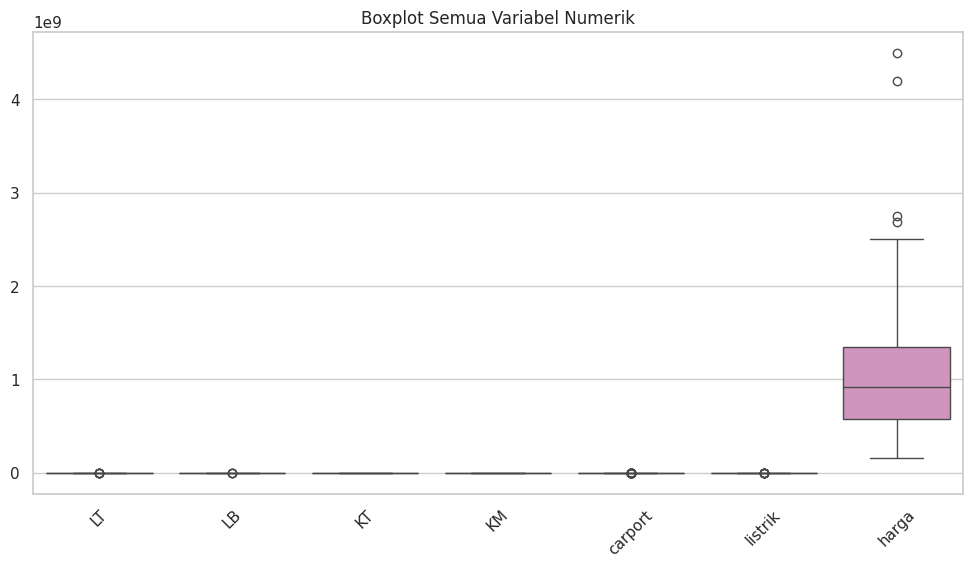

In [216]:
# AMBIL HANYA KOLOM NUMERIK
num_cols = dfX2.select_dtypes(include=['int64']).columns

# BUAT BOXPLOT UNTUK SEMUA KOLOM NUMERIK
plt.figure(figsize=(12,6))
sns.boxplot(data=dfX2[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot Semua Variabel Numerik")
plt.show()

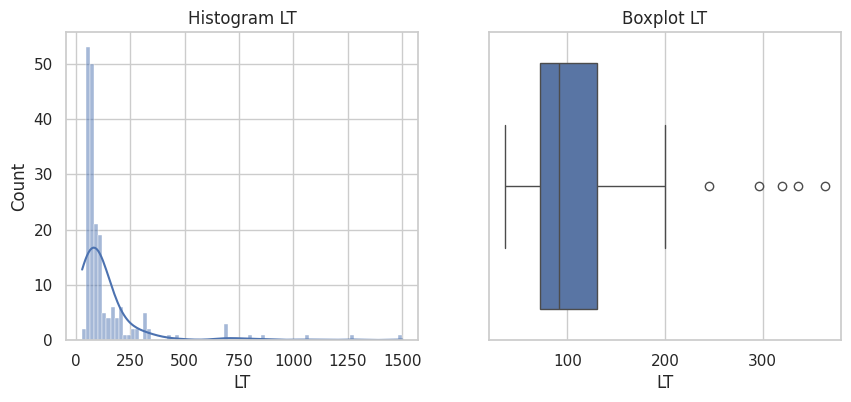

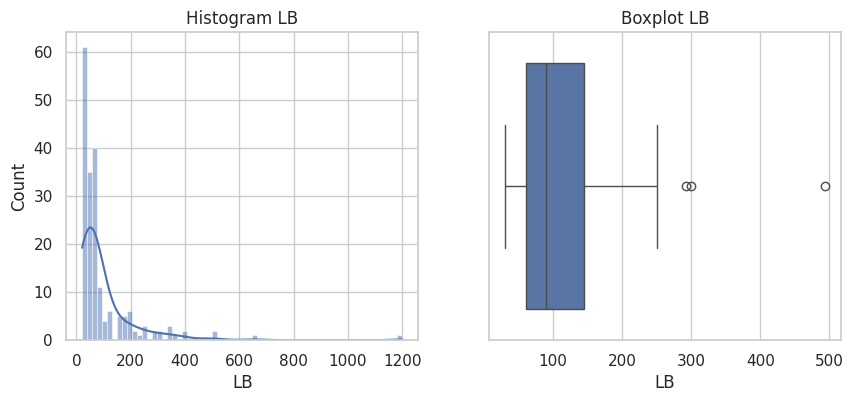

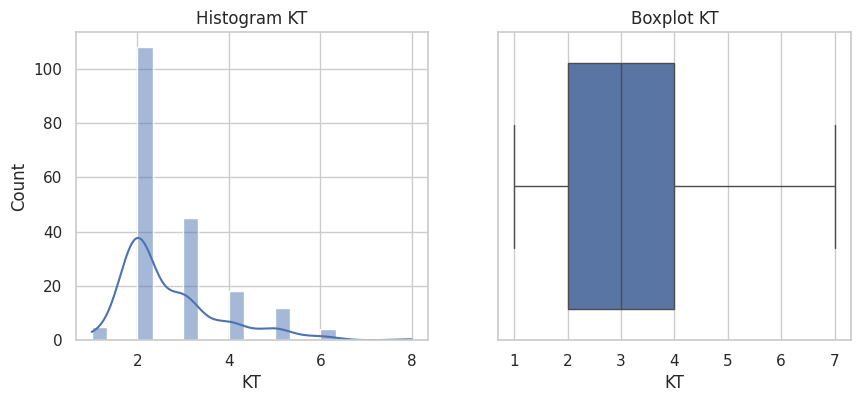

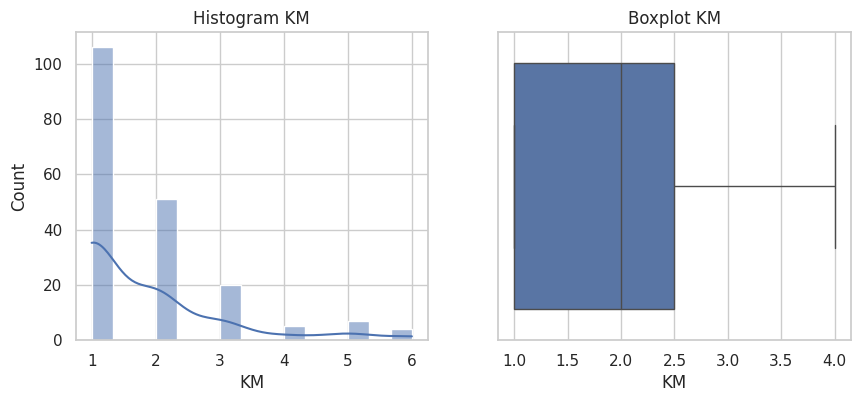

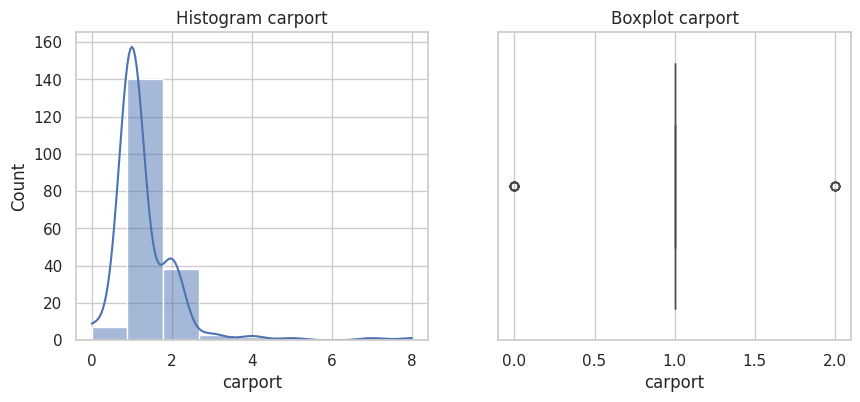

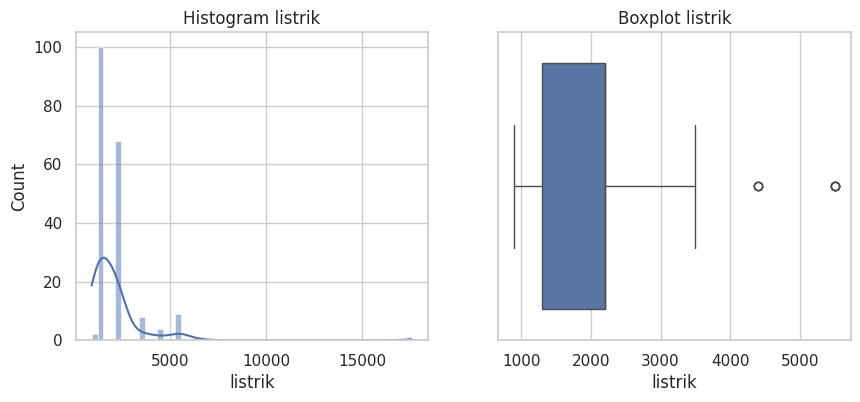

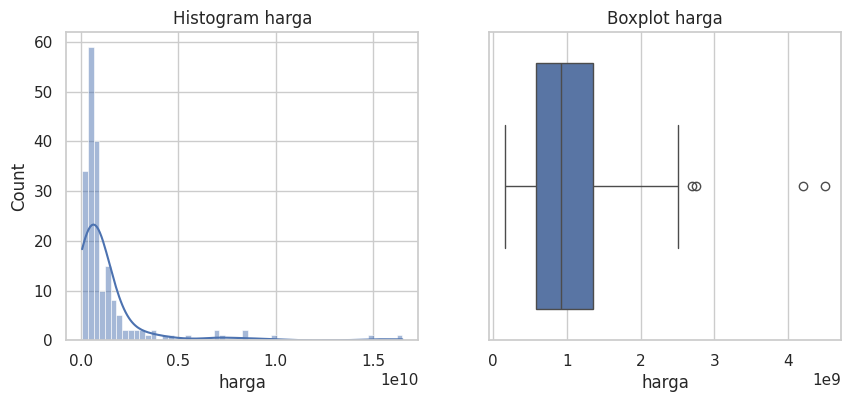

In [217]:
# Cek Distribusi Data
import matplotlib.pyplot as plt
import seaborn as sns

kolom_numerik = ['LT','LB','KT','KM','carport','listrik','harga']

for col in kolom_numerik:
    fig, axes = plt.subplots(1, 2, figsize=(10,4))

    # Histogram
    sns.histplot(dfB[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram {col}")

    # Boxplot
    sns.boxplot(x=dfX2[col], ax=axes[1])
    axes[1].set_title(f"Boxplot {col}")

    # ini harus indentasi normal, bukan whitespace aneh
    plt.show()

Batas bawah: -573750000.0
Batas atas: 2504250000.0

Outliers:
0      True
1      True
2      True
3      True
4      True
       ... 
102    True
103    True
104    True
105    True
106    True
Name: harga, Length: 107, dtype: bool


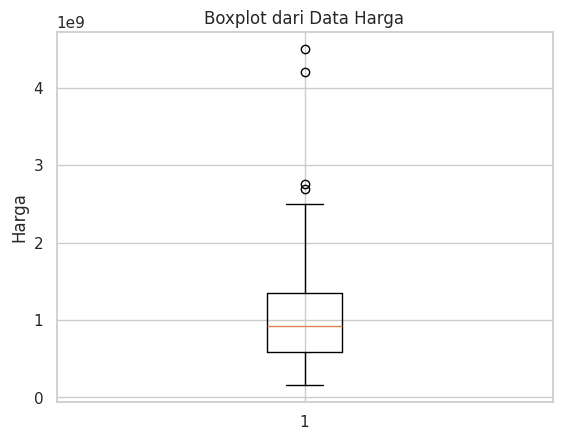

In [218]:
# MENGECEK OUTLIER DENGAN MELIHAT DISTRIBUSI DARI VARIABEL KONTINU
# MENGHITUNG Q1 DAN Q3
Q1 = dfX2['harga'].quantile(0.25)
Q3 = dfX2['harga'].quantile(0.75)
IQR = Q3 - Q1

# MENGHITUNG BATAS BAWAH DAN BATAS ATAS
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5* IQR

bukan_outlier = (dfX2["harga"] >= Q1 - 1.5 * IQR) & (dfX2["harga"] <= Q3 + 1.5*IQR)

# BUAT DATAFRAME TANPA OUTLIER
dfX2_bukan_outlier = dfX2[bukan_outlier]

# BUAT DATAFRAME DENGAN ADANYA OUTLIER
dfX2_outlier = dfX2[~bukan_outlier]

# MENAMPILKAN HASIL
print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)
print("\nOutliers:")
print(bukan_outlier)

# MEMBUAT BOXPLOT
plt.boxplot(dfX2['harga'])
plt.title("Boxplot dari Data Harga")
plt.ylabel("Harga")
plt.show()

In [219]:
# MENAMPILKAN DATA BEKASI TANPA OUTLIER
dfX2_bukan_outlier

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-12-08,71,43,2,1,1,Kabupaten Bekasi,SHM,1300,550000000,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,2021-12-08,59,60,2,1,1,Kabupaten Bekasi,SHM,2200,440000000,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,2021-12-08,124,95,2,1,1,Kabupaten Bekasi,SHM,2200,699000000,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,2021-12-08,144,100,2,1,1,Kabupaten Bekasi,SHM,2200,1350000000,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,2021-12-08,108,100,3,2,1,Kabupaten Bekasi,SHM,2200,1400000000,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...
102,2021-12-01,180,220,5,3,0,Kota Bekasi,SHM,2200,1600000000,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,2021-12-01,140,250,3,2,0,Kabupaten Bekasi,SHM,2200,850000000,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,2021-12-01,60,55,2,1,0,Kabupaten Bekasi,SHM,1300,250000000,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,2021-12-01,36,60,2,1,0,Kabupaten Bekasi,SHM,1300,300000000,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."


In [220]:
# MENAMPILAN DATA BEKASI DENGAN OUTLIER
dfX2_outlier

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
7,2021-12-07,336,200,4,3,1,Kabupaten Bekasi,HGB,5500,4200000000,https://www.99.co/id/properti/rumah-cluster-pa...,"Harga Rp 4,2 Miliyar ( Nego ); Luas Tanah 336 ..."
15,2021-12-06,245,117,3,2,0,Kota Bekasi,SHM,2200,2750000000,https://www.rumah123.com/properti/bekasi/hos91...,"Rumah 1 lantai Hook, Lokasi yang Strategis dek..."
31,2021-12-06,200,293,6,4,1,Kota Bekasi,SHM,5500,4500000000,https://www.99.co/id/properti/rumah-mewah-harg...,"Jual cepat rumah mewah harga murah , 3 Lantai,..."
100,2021-12-01,144,180,4,3,2,Kota Bekasi,SHM,4400,2690000000,https://www.rumah123.com/properti/bekasi/hos92...,Rumah cantik furmished dan renovasi di asera o...


# **DATA GABUNGAN WILAYAH**

In [3]:
# Membuang baris kosong
dfJ.dropna(how = "all", inplace = True)
dfB.dropna(how = "all", inplace = True)
dfT.dropna(how = "all", inplace = True)
dfX.dropna(how = "all", inplace = True)
dfD.dropna(how = "all", inplace = True)

In [4]:
# Membuang kolom kosong
dfJ.dropna(how = "all", axis = 1, inplace = True)
dfB.dropna(how = "all", axis = 1, inplace = True)
dfT.dropna(how = "all", axis = 1, inplace = True)
dfX.dropna(how = "all", axis = 1, inplace = True)
dfD.dropna(how = "all", axis = 1, inplace = True)

In [5]:
# Setelah memeriksa sebagian data dengan perintah .head pada tiap wilayah di atas
# diperoleh indikasi adanya perbedaan format harga, sehingga akan diperiksa persebaran isi dari kolom harga dengan describe
for i in [dfJ, dfD, dfB, dfT, dfX]:
  print(i["harga"].describe())

count    1.210000e+02
mean     8.985955e+09
std      1.587610e+10
min      3.800000e+08
25%      1.600000e+09
50%      3.400000e+09
75%      7.250000e+09
max      1.050000e+11
Name: harga, dtype: float64
count     118.000000
mean     1194.440678
std      1474.387409
min        41.000000
25%       485.000000
50%       810.000000
75%      1137.500000
max      9000.000000
Name: harga, dtype: float64
count    1.930000e+02
mean     1.289362e+09
std      2.115854e+09
min      6.500000e+07
25%      3.990000e+08
50%      6.700000e+08
75%      1.250000e+09
max      1.650000e+10
Name: harga, dtype: float64
count       124.000000
mean       3849.556452
std        9316.413817
min          95.000000
25%        1037.500000
50%        1950.000000
75%        3775.000000
max      100000.000000
Name: harga, dtype: float64
count    1.070000e+02
mean     1.074823e+09
std      7.516152e+08
min      1.600000e+08
25%      5.805000e+08
50%      9.200000e+08
75%      1.350000e+09
max      4.500000e+09
Name: ha

In [6]:
# maka kami ubah format harga di wilayah lainnya ke dalam satuan juta juga
dfJ["harga"] = dfJ["harga"] / 1000000
dfX["harga"] = dfX["harga"] / 1000000
dfB["harga"] = dfB["harga"] / 1000000

In [7]:
for i in [dfJ, dfD, dfB, dfT, dfX]:
  print(i["harga"].describe())

count       121.000000
mean       8985.954976
std       15876.095204
min         380.000000
25%        1600.000000
50%        3400.000000
75%        7250.000000
max      105000.000000
Name: harga, dtype: float64
count     118.000000
mean     1194.440678
std      1474.387409
min        41.000000
25%       485.000000
50%       810.000000
75%      1137.500000
max      9000.000000
Name: harga, dtype: float64
count      193.000000
mean      1289.361525
std       2115.853975
min         65.000000
25%        399.000000
50%        670.000000
75%       1250.000000
max      16500.000000
Name: harga, dtype: float64
count       124.000000
mean       3849.556452
std        9316.413817
min          95.000000
25%        1037.500000
50%        1950.000000
75%        3775.000000
max      100000.000000
Name: harga, dtype: float64
count     107.000000
mean     1074.823355
std       751.615160
min       160.000000
25%       580.500000
50%       920.000000
75%      1350.000000
max      4500.000000
Name: ha

In [8]:
# Memberikan informasi wilayah
dfJ["wilayah"] = "Jakarta"
dfD["wilayah"] = "Depok"
dfB["wilayah"] = "Bogor"
dfT["wilayah"] = "Tangerang"
dfX["wilayah"] = "Bekasi"

In [9]:
# Menggabung data wilaya
dfgabungan = pd.concat([dfJ, dfB, dfX, dfT, dfD], axis = 0, ignore_index=True)
dfgabungan

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,wilayah
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4500.0,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,Jakarta
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",Jakarta
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,395.0,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,835.0,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",Jakarta
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Timur,195.0,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...,Depok
661,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...,Depok
662,4-12-2021,100,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,NaN,1750.0,https://www.rumah123.com/properti/depok/hos928...,Dijual cepat rumah bagus siap huni,Depok
663,NOTE:,- lokasi yang kami gunakan hanya per kecamatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok


In [10]:
# periksa kolom created_at
wilayah = ["Jakarta", "Depok", "Bogor", "Tangerang", "Bekasi"]
for i in wilayah:
  print(i)
  print(dfgabungan[dfgabungan["wilayah"] == i]["created_at"].unique())

Jakarta
['06-12-2021' '02-12-2021' '05-12-2021' '07-12-2021' '07-11-2021'
 '01-12-2021' '18-11-2021' '04-12-2021' '29-11-2021' '22-11-2021'
 '15-11-2021' '06-11-2021' '16-11-2021' '03-12-2021' '06-10-2021'
 '12-02-2021' '26-12-2021' '25-11-2021' '24-11-2021']
Depok
['6-12-2021' '5-12-2021' '4-12-2021' 'NOTE:' nan]
Bogor
['03-12-2021' '06-12-2021' '07-12-2021' '02-12-2021' '01-12-2021'
 '04-12-2021' '05-12-2021']
Tangerang
['12-06-2021' '12-07-2021' '12-08-2021']
Bekasi
['08-12-2021' '07-12-2021' '06-12-2021' '05-12-2021' '04-12-2021'
 '03-12-2021' '02-12-2021' '01-12-2021']


Dikarenakan isi kolom created_at kurang relevan dengan data (hanya mencatat waktu input data dan tidak memengaruhi harga rumah), maka akan dilakukan penghapusan pada kolom tersebut.

In [11]:
dfgabungan.drop(["created_at"], axis = 1, inplace = True)

In [12]:
# cek kolom setelah kolom created_at dihapus
dfgabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          665 non-null    object 
 1   LB          663 non-null    float64
 2   KT          663 non-null    float64
 3   KM          662 non-null    float64
 4   garasi      333 non-null    float64
 5   carport     550 non-null    float64
 6   lokasi      663 non-null    object 
 7   sertifikat  658 non-null    object 
 8   listrik     628 non-null    float64
 9   hadap       214 non-null    object 
 10  harga       663 non-null    float64
 11  URL         663 non-null    object 
 12  deskripsi   654 non-null    object 
 13  wilayah     665 non-null    object 
dtypes: float64(7), object(7)
memory usage: 72.9+ KB


In [13]:
# seharusnya kolom 'LT' tipe datanya numerik, tp itu malah float, maka kita cek
dfgabungan["LT"].unique()

array([202.0, 30.0, 19.0, 33.0, 217.0, 424.0, 597.0, 60.0, 71.0, 75.0,
       45.0, 24.0, 3422.0, 23.0, 50.0, 652.0, 840.0, 21.0, 16.0, 700.0,
       18.0, 1000.0, 189.0, 390.0, 124.0, 225.0, 290.0, 432.0, 243.0,
       239.0, 130.0, 97.0, 485.0, 90.0, 511.0, 205.0, 695.0, 135.0, 612.0,
       790.0, 950.0, 738.0, 719.0, 85.0, 47.0, 160.0, 84.0, 147.0, 49.0,
       52.0, 79.0, 140.0, 400.0, 119.0, 184.0, 863.0, 120.0, 500.0, 200.0,
       128.0, 300.0, 168.0, 170.0, 98.0, 330.0, 144.0, 260.0, 162.0, 36.0,
       150.0, 240.0, 250.0, 175.0, 375.0, 320.0, 640.0, 80.0, 232.0,
       153.0, 317.0, 95.0, 100.0, 72.0, 112.0, 69.0, 109.0, 86.0, 96.0,
       67.0, 122.0, 220.0, 70.0, 315.0, 125.0, 312.0, 105.0, 78.0, 1500.0,
       699.0, 66.0, 314.0, 1272.0, 338.0, 62.0, 196.0, 167.0, 91.0, 108.0,
       210.0, 156.0, 255.0, 270.0, 800.0, 280.0, 276.0, 437.0, 106.0,
       180.0, 867.0, 696.0, 698.0, 81.0, 65.0, 93.0, 38.0, 102.0, 188.0,
       470.0, 195.0, 142.0, 89.0, 313.0, 131.0, 345.0, 

In [14]:
dfgabungan[(dfgabungan["LT"] == '- lokasi yang kami gunakan hanya per kecamatan') | (dfgabungan["LT"] == '-harga yang kami gunakan adalah per satuan juta')]
dfgabungan[dfgabungan["LT"].isin(['- lokasi yang kami gunakan hanya per kecamatan',  '-harga yang kami gunakan adalah per satuan juta'])]

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,wilayah
663,- lokasi yang kami gunakan hanya per kecamatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
664,-harga yang kami gunakan adalah per satuan juta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok


Terdeteksi adanya noise berupa nilai non-numeric pada kolom yang seharusnya numerik. baris data tidak memuat informasi apapun, sehingga baris-baris tersebut dapat kita hapus.

In [15]:
dfgabungan.drop(dfgabungan[dfgabungan["LT"].isin(['- lokasi yang kami gunakan hanya per kecamatan',  '-harga yang kami gunakan adalah per satuan juta'])].index, inplace = True)

In [16]:
# ubah tipe data
dfgabungan["LT"] = dfgabungan["LT"].astype("float64")
dfgabungan["lokasi"] = dfgabungan["lokasi"].astype("category")
dfgabungan["wilayah"] = dfgabungan["wilayah"].astype("category")

In [17]:
dfgabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LT          663 non-null    float64 
 1   LB          663 non-null    float64 
 2   KT          663 non-null    float64 
 3   KM          662 non-null    float64 
 4   garasi      333 non-null    float64 
 5   carport     550 non-null    float64 
 6   lokasi      663 non-null    category
 7   sertifikat  658 non-null    object  
 8   listrik     628 non-null    float64 
 9   hadap       214 non-null    object  
 10  harga       663 non-null    float64 
 11  URL         663 non-null    object  
 12  deskripsi   654 non-null    object  
 13  wilayah     663 non-null    category
dtypes: category(2), float64(8), object(4)
memory usage: 66.5+ KB


In [18]:
# cek duplikasi data gabungan
dfgabungan.duplicated().sum()

np.int64(0)

tidak ditemukan adanya duplikasi data

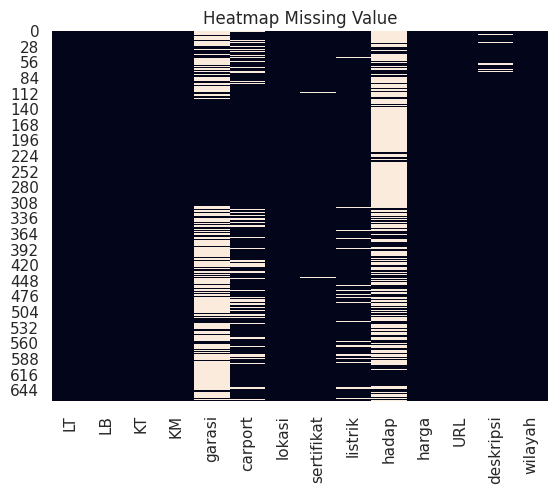

In [19]:
# Memeriksa missing value dengan heatmap
sns.heatmap(dfgabungan.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [20]:
# persentase missing value
dfgabungan.isnull().sum()/len(dfgabungan)*100

,0
LT,0.000000
LB,0.000000
KT,0.000000
KM,0.150830
garasi,49.773756
carport,17.043741
lokasi,0.000000
sertifikat,0.754148
listrik,5.279035
hadap,67.722474


In [21]:
# Penanganan MV
# asumsi MV pada KM, garasi, carport sebagai tidak punya alias 0
dfgabungan["KM"].fillna(0, inplace = True)
dfgabungan["garasi"].fillna(0, inplace = True)
dfgabungan["carport"].fillna(0, inplace = True)

# asumsi MV pada sertifikat sebagai Lainnya
dfgabungan["sertifikat"].fillna("Lainnya", inplace = True)

# pemberian "-" untuk MV pada deskripsi dan hadap
dfgabungan["deskripsi"].fillna("-", inplace = True)
dfgabungan["hadap"].fillna("-", inplace = True)

# inputasi nilai median kolo listrik ke MV
dfgabungan["listrik"].fillna(dfgabungan["listrik"].median(), inplace = True)

In [22]:
# persentase missing value setelah dihapus pada data
dfgabungan.isnull().sum()/len(dfgabungan)*100

,0
LT,0.0
LB,0.0
KT,0.0
KM,0.0
garasi,0.0
carport,0.0
lokasi,0.0
sertifikat,0.0
listrik,0.0
hadap,0.0


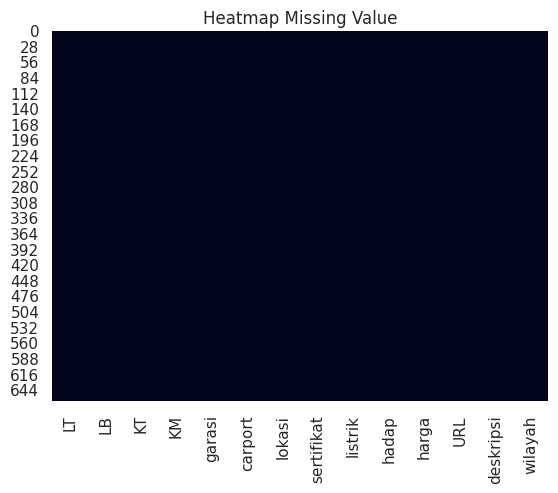

In [23]:
# Kondisi heatmap setelah pananganan MV
sns.heatmap(dfgabungan.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

missing value sudah teratasi

In [24]:
# Memeriksa Noise pada sertifikat
l = []
for i in wilayah:
  print(i)
  l += list(dfgabungan[dfgabungan["wilayah"] == i]["sertifikat"].unique())
  print(l)

k = []
for i in l:
  if i != "SHM":
    k.append(i)
k

Jakarta
['SHM', 'SHGB', 'SHM + IMB', 'SHM + IMB + PBB', 'SHM + Hak Pakai', 'PPJB', 'Lainnya', 'AJB']
Depok
['SHM', 'SHGB', 'SHM + IMB', 'SHM + IMB + PBB', 'SHM + Hak Pakai', 'PPJB', 'Lainnya', 'AJB', 'SHM', 'Lainnya']
Bogor
['SHM', 'SHGB', 'SHM + IMB', 'SHM + IMB + PBB', 'SHM + Hak Pakai', 'PPJB', 'Lainnya', 'AJB', 'SHM', 'Lainnya', 'SHM', 'SHGB', 'Lainnya']
Tangerang
['SHM', 'SHGB', 'SHM + IMB', 'SHM + IMB + PBB', 'SHM + Hak Pakai', 'PPJB', 'Lainnya', 'AJB', 'SHM', 'Lainnya', 'SHM', 'SHGB', 'Lainnya', 'SHM', 'HGB', 'Lainnya', 'lainnya(PPJB, GIRIK, ADAT, dll)']
Bekasi
['SHM', 'SHGB', 'SHM + IMB', 'SHM + IMB + PBB', 'SHM + Hak Pakai', 'PPJB', 'Lainnya', 'AJB', 'SHM', 'Lainnya', 'SHM', 'SHGB', 'Lainnya', 'SHM', 'HGB', 'Lainnya', 'lainnya(PPJB, GIRIK, ADAT, dll)', 'SHM', 'HGB', 'SHM,IMB', 'Lainnya']


['SHGB',
 'SHM + IMB',
 'SHM + IMB + PBB',
 'SHM + Hak Pakai',
 'PPJB',
 'Lainnya',
 'AJB',
 'Lainnya',
 'SHGB',
 'Lainnya',
 'HGB',
 'Lainnya',
 'lainnya(PPJB, GIRIK, ADAT, dll)',
 'HGB',
 'SHM,IMB',
 'Lainnya']

In [25]:
# penanganan Noise sertfikat
for i in k:
  dfgabungan["sertifikat"] = dfgabungan["sertifikat"].replace(i, "Lainnya")

In [26]:
list(dfgabungan["sertifikat"].unique()) # kondisi setelah penanganan noise

['SHM', 'Lainnya']

In [27]:
# periksa noise pada URL apakah ada yang bukan link
urllist= list(dfgabungan["URL"].unique())
noturl = []
for i in urllist:
  if "http" not in i:
    noturl.append(i)
    print(i)
    noturl

Rumah murah di metland cibitung bekasi - Dijual: Rumah & Apartemen - 840087312 (olx.co.id)
Rumah dijual di Griya gandasari cibitung - Dijual: Rumah & Apartemen - 840088652 (olx.co.id)
Jual cepat rumah huuk di metland cibitung bekasi - Dijual: Rumah & Apartemen - 840592462 (olx.co.id)
Rumah krem harga murah di Taman Wisma Asri 2 dekat Sumarecon Bekasi - Dijual: Rumah & Apartemen - 849295145 (olx.co.id)
Rumah Bagus Full Renov di Harapan Indah Bekasi - Dijual: Rumah & Apartemen - 849293743 (olx.co.id)
RUMAH FRESH MANIS SIAP HUNI di Taman Wanasari Indah Cibitung - Dijual: Rumah & Apartemen - 849215260 (olx.co.id)
Rumah Cantik Siap Huni Tanah Luas Akses 2 Mobil Murah di Bekasi - hos9285628 | Rumah123.com


Terdapat Non-link pada kolom URL, namun ada domain dari tempat rumah tersebut dijual serta judul iklan. Oleh karena itu, menganggapnya bukan sebagai noise pada kolom tersebut.

<Axes: xlabel='harga'>

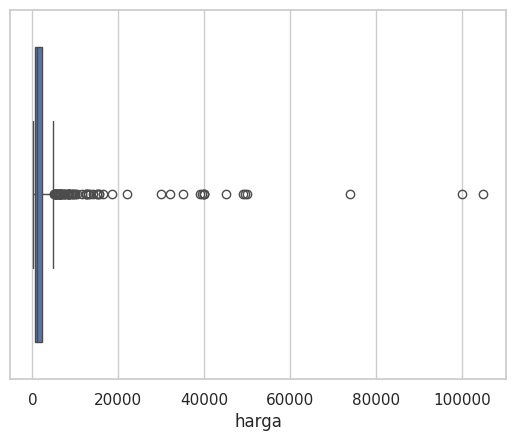

In [28]:
# Memeriksa Outlier pada kolom Harga
sns.boxplot(x="harga", data=dfgabungan)

In [29]:
# Mengolah outlier dengan median pada tiap wilayah dan memisahkannya dari data tanpa outlier
datagab_no_outlier = pd.DataFrame({
    'LT': [],         # Luas Tanah
    'LB': [],         # Luas Bangunan
    'KT': [],         # Kamar Tidur
    'KM': [],         # Kamar Mandi
    'garasi': [],     # Garasi
    'carport': [],    # Carport
    'lokasi': [],     # Lokasi
    'sertifikat': [], # Sertifikat (HGB/SHM)
    'listrik': [],    # Daya listrik
    'hadap': [],      # Arah rumah (hadap ke arah mana)
    'harga': [],      # Harga rumah
    'URL': [],        # Link URL properti
    'deskripsi': [],  # Deskripsi properti
    'wilayah': []     # Wilayah/lokasi geografis
})

datagab_outlier = pd.DataFrame({
    'LT': [],         # Luas Tanah
    'LB': [],         # Luas Bangunan
    'KT': [],         # Kamar Tidur
    'KM': [],         # Kamar Mandi
    'garasi': [],     # Garasi
    'carport': [],    # Carport
    'lokasi': [],     # Lokasi
    'sertifikat': [], # Sertifikat (HGB/SHM)
    'listrik': [],    # Daya listrik
    'hadap': [],      # Arah rumah (hadap ke arah mana)
    'harga': [],      # Harga rumah
    'URL': [],        # Link URL properti
    'deskripsi': [],  # Deskripsi properti
    'wilayah': []     # Wilayah/lokasi geografis
})

for i in wilayah:
  Q1harga = dfgabungan[dfgabungan["wilayah"] == i]["harga"].quantile(0.25)
  Q3harga = dfgabungan[dfgabungan["wilayah"] == i]["harga"].quantile(0.75)
  IQRharga = Q3harga - Q1harga

  lower_boundharga = Q1harga - 1.5 * IQRharga
  upper_boundharga = Q3harga + 1.5 * IQRharga

  bersih = (dfgabungan[dfgabungan["wilayah"] == i]["harga"] >= lower_boundharga) & (dfgabungan[dfgabungan["wilayah"] == i]["harga"] <= upper_boundharga)
  dfno_outlier = dfgabungan[dfgabungan["wilayah"] == i][bersih]
  dfoutlier = dfgabungan[dfgabungan["wilayah"] == i][~bersih]

  datagab_no_outlier = pd.concat([datagab_no_outlier, dfno_outlier], ignore_index=True) # Changed from dictionary to DataFrame
  datagab_outlier = pd.concat([datagab_outlier, dfoutlier], ignore_index=True) # Changed from dictionary to DataFrame

In [30]:
datagab_no_outlier

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,wilayah
0,202.0,198.0,8.0,3.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,-,4500.0,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,Jakarta
1,30.0,55.0,2.0,1.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,-,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",Jakarta
2,19.0,35.0,2.0,1.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,-,395.0,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
3,33.0,42.0,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,-,835.0,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",Jakarta
4,30.0,55.0,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,-,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,180.0,220.0,5.0,3.0,0.0,0.0,Kota Bekasi,SHM,2200.0,-,1600.0,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...,Bekasi
600,140.0,250.0,3.0,2.0,0.0,0.0,Kabupaten Bekasi,SHM,2200.0,Selatan,850.0,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju...",Bekasi
601,60.0,55.0,2.0,1.0,0.0,0.0,Kabupaten Bekasi,SHM,1300.0,-,250.0,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ...",Bekasi
602,36.0,60.0,2.0,1.0,0.0,0.0,Kabupaten Bekasi,SHM,1300.0,Timur,300.0,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ...",Bekasi


# **INSIGHT UNTUK PERUSAHAAN PROPERTY**

1. **Kualitas data yang dimiliki perusahaan.**
   <br> setelah dilakukan analisis melalui preprocessing. ditemukan jika dataset properti masih memiliki sejumlah permasalahan kualitas data yang cukup signifikan. diantaranya:

   *  adanya keberadaan missing value yang cukup tinggi pada masing-masing wilayah yaitu Tangerang, Bekasi, Bogor, Depok, dan Jakarta. Bahkan di beberapa kota, terdapat lebih dari setengah data yang kosong. Hal ini bisa dikarenakan data belum terkumpul secara menyeluruh atau terdapat kendala dalam proses pencatatan. sehingga dataset menjadi kurang representatif dan berpotensi menurunkan akurasi analisis.
   *  terdapat inkonsistensi pada data, seperti perbedaan satuan harga antar kota dimana kota Depok dan Tangerang berbeda dengan kota lainnya, sehingga bisa menimbulkan outlier harga dan membuat distribusi tidak seimbang, selain itu format penulisan lokasi juga tidak seragam (ada yang menggunakan kecamatan, kota, bahkan nama jalan).
   *  terdapat kolom yang kurang relevan untuk analisis harga properti, seperti Created_at, karena kolom ini hanya penanda waktu data diinput, bukan faktor penentu harga rumah.
   
   <br> namun demikian, dataset ini sudah mencakup variabel-variabel penting yang sangat relevan untuk analisis properti, seperti luas tanah (LT), luas bangunan (LB), jumlah kamar tidur (KT), jumlah kamar mandi (KM), fasilitas rumah (garasi dan carport), daya listrik, serta sertifikasi properti. Variabel-variabel ini dapat mendukung pengambilan keputusan dalam pembelian rumah meskipun data masih perlu dibersihkan dan disempurnakan.

2. **Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.**
   <br> Untuk mewujudkan RPPI sebagai perusahaan yang unggul dan berbasis data, diperlukan peningkatan signifikan dalam kualitas serta kelengkapan data. Saat ini, masih banyak ditemukan missing values, bahkan pada beberapa variabel jumlah data kosong mencapai lebih dari 50%. Kondisi ini membuat data kurang komprehensif sehingga dapat menghambat kemampuan perusahaan dalam menghasilkan analisis yang akurat dan pengambilan keputusan yang tepat.
   
   <br> Beberapa langkah perbaikan yang disarankan meliputi: melakukan survei lebih mendalam agar data yang diperoleh akurat, benar, dan lengkap; serta menerapkan format standar pada seluruh data agar konsisten. Perusahaan juga perlu memastikan bahwa informasi yang diberikan lebih spesifik sehingga analisis dapat dilakukan secara lebih terarah dan bermanfaat.

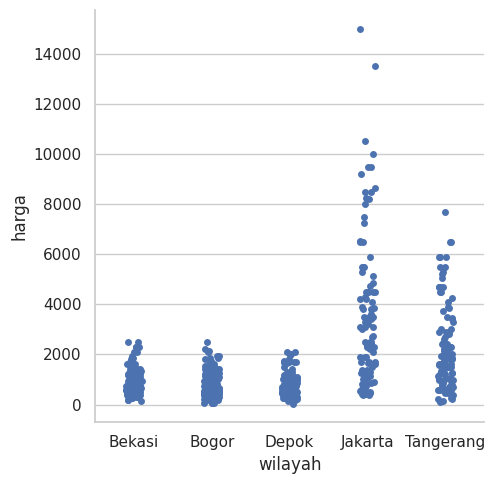

In [31]:
catp = sns.catplot(x = "wilayah", y = "harga", data = datagab_no_outlier)

3. **Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?**
- Dari data terlihat bahwa harga rumah di Jakarta cenderung paling tinggi dengan sebaran luas hingga di atas 10.000, disusul oleh Tangerang yang juga relatif mahal. Sementara itu, Bekasi, Bogor, dan Depok memiliki kisaran harga lebih rendah dan terkonsentrasi di bawah 3.000, sehingga dapat disimpulkan rumah di ketiga wilayah (bekasi, bogor, depok) tersebut relatif lebih terjangkau.

4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
   
* rekomendasi utama RPPI untuk buka cabang adalah di Tangerang (khususnya area BSD dan sekitarnya). sebagai lokasi cabang untuk fokus pada pasar menengah–atas dengan potensi profit besar
   
   Alasannya:
   - Pasar aktif & berkembang pesat → distribusi harga properti di Tangerang cukup tinggi dimana segmen menengah–atas aktif membeli.
   - Potensi margin besar → banyak rumah dengan LT dan LB luas, memberi potensi keuntungan lebih tinggi.
   - Dukungan infrastruktur → BSD dan sekitarnya berkembang pesat dengan akses tol dan transportasi, mendorong kenaikan nilai properti.

* Depok bisa jadi rekomendasi kedua sebagai pasar yang volume transaksinya lebih tinggi karena harganya relatif lebih terjangkau, tapi margin keuntungan per unit lebih kecil dibanding Tangerang.



5. **Rumah dengan karakteristik seperti apa yang paling banyak dijual?**

In [32]:
dfgabungan[["LT", "LB", "KM", "KT", "garasi","carport"]].mode()

,LT,LB,KM,KT,garasi,carport
0,60.0,36.0,2.0,2.0,0.0,1.0


Berdasarkan data diatas, rumah yang paling banyak dijual memiliki karakteristik berupa **luas tanah sekitar 60 m²** dengan **luas bangunan rata-rata 36 m²**. Properti jenis ini umumnya dilengkapi dengan **2 kamar tidur** dan **2 kamar mandi**, serta fasilitas tambahan berupa **1 carport** namun tanpa garasi. Hal ini menunjukkan bahwa pasar perumahan lebih didominasi oleh tipe rumah sederhana hingga menengah yang sesuai dengan kebutuhan keluarga kecil atau pasangan muda, sehingga segmen ini menjadi yang paling aktif dipasarkan oleh penjual maupun developer.


In [33]:
filtered_df = dfgabungan[
    (dfgabungan['KM'] >= 1) & (dfgabungan['KM'] <= 2) &  # Kondisi untuk Kamar Mandi
    (dfgabungan['KT'] >= 1) & (dfgabungan['KT'] <= 3) &  # Kondisi untuk Kamar Tidur
    (dfgabungan['garasi'] >= 0) & (dfgabungan['garasi'] <= 1) &  # Kondisi untuk Garasi
    (dfgabungan['carport'] >= 1) & (dfgabungan['carport'] <= 2) &  # Kondisi untuk Carport
    (dfgabungan['LB'] >= 70) & (dfgabungan['LB'] <= 150) & # Kondisi untuk Luas Bangunan
    (dfgabungan['harga'] <= 900) & # Kondisi untuk Harga
    (dfgabungan['LT'] <= 100) # Kondisi untuk Wilayah
]
filtered_df.shape

(37, 14)

In [34]:
filtered_df['harga'].sum()

np.float64(24872.968)

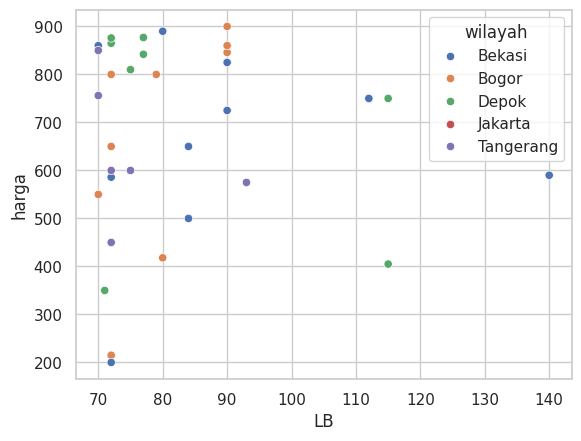

In [36]:
# menganalisa outlier
p = sns.scatterplot(y=filtered_df['harga'], x=filtered_df['LB'], hue = filtered_df['wilayah'])

6. **Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?**

Berdasarkan hasil analisis dan kriteria yang telah ditentukan, RPPI memiliki peluang investasi yang menarik dengan anggaran maksimal Rp 25 Miliar. Dari filter data, terdapat sekitar 37 properti yang sesuai dengan kriteria, dengan total nilai investasi mencapai Rp 24,87 Miliar—masih di bawah batas yang ditetapkan, sehingga memberi ruang fleksibilitas untuk pemilihan maupun negosiasi harga. Properti yang terpilih umumnya memiliki 1–2 kamar mandi dan 1–3 kamar tidur, dengan luas bangunan antara 70–150 m², serta fasilitas garasi maksimal satu unit dan carport hingga dua unit. Karakteristik ini menunjukkan bahwa rumah-rumah tersebut menyasar segmen keluarga kecil hingga menengah yang merupakan pasar paling aktif di banyak kota. Harga per unit yang berada di bawah Rp 900 juta juga menjadikannya lebih terjangkau bagi pembeli di segmen menengah ke bawah.

Selain itu, lokasi yang paling direkomendasikan untuk investasi adalah kawasan **BSD De Park**. Kawasan ini dinilai sangat strategis karena dekat dengan akses tol, pusat perbelanjaan, serta fasilitas umum lainnya, sehingga permintaan properti di daerah ini cenderung tinggi baik untuk penjualan maupun penyewaan. Dengan kombinasi karakteristik properti yang sesuai dengan pasar menengah dan lokasi premium seperti BSD De Park, investasi ini berpotensi memberikan keuntungan signifikan bagi RPPI dalam jangka pendek maupun menengah.


<Axes: xlabel='harga'>

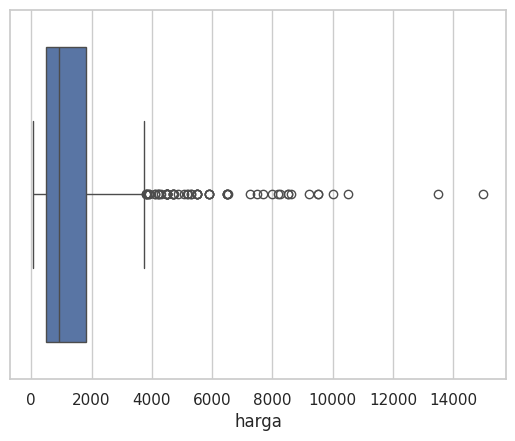

In [37]:
# Memeriksa Outlier pada kolom Harga
sns.boxplot(x="harga", data=datagab_no_outlier)

In [38]:
datagab_no_outlier["harga"].describe()

,harga
count,604.000000
mean,1578.267261
std,1838.246829
min,41.000000
25%,500.000000
50%,920.000000
75%,1800.000000
max,15000.000000


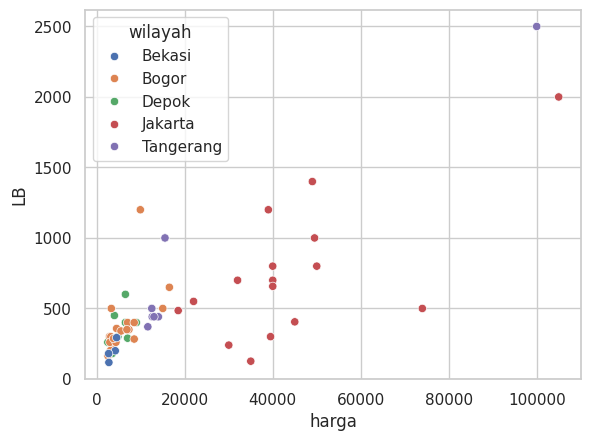

In [39]:
p = sns.scatterplot(x=datagab_outlier['harga'], y=datagab_outlier['LB'], hue = datagab_outlier['wilayah'])

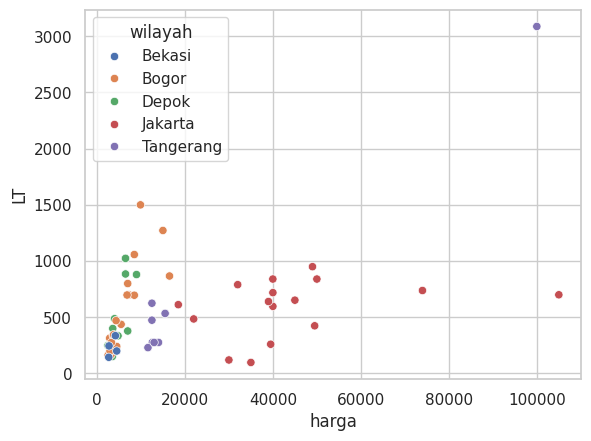

In [40]:
p = sns.scatterplot(x=datagab_outlier['harga'], y=datagab_outlier['LT'], hue = datagab_outlier['wilayah'])

Walaupun outlier sudah dipisahkan di setiap wilayah Jabodetabek, masih terlihat cukup banyak data dengan nilai ekstrem. Secara umum, harga rumah di kawasan ini tersebar antara Rp 41 juta hingga Rp 4 miliar. Dari hasil visualisasi, terlihat bahwa rumah dengan harga jauh lebih tinggi umumnya memiliki luas bangunan dan tanah di atas 1.000 m², sehingga menawarkan ruang yang sangat luas serta potensi pengembangan lebih lanjut.

Dari sisi nilai, rumah-rumah serupa di luar Jakarta biasanya berada pada kisaran Rp 2,5–20 miliar, sementara di Jakarta harga dapat mencapai puluhan hingga ratusan miliar. Kondisi ini menunjukkan bahwa RPPI berpeluang memperluas portofolio investasinya pada segmen properti premium, khususnya untuk menyasar pasar kelas atas di Jabodetabek maupun di wilayah kota besar lain.

7. **Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?**

Selain insight utama yang sudah dianalisis, data ini juga memberikan informasi tambahan yang berharga. Pertama, distribusi data iklan tidak merata antar waktu dan wilayah, sehingga perlu perbaikan sistem pengumpulan data agar tren harga lebih konsisten. Kedua, masih banyak ditemukan outlier harga, yang mengindikasikan perlunya validasi input agar data lebih akurat. Ketiga, terdapat banyak missing values di beberapa atribut seperti garasi, carport, atau hadap, yang bisa menjadi bahan evaluasi apakah fitur tersebut penting untuk dicatat. Keempat, karakteristik rumah yang paling banyak dijual adalah tipe menengah dengan luas tanah sekitar 60 m² dan 2 kamar tidur, sehingga segmen ini patut menjadi fokus strategi bisnis. Terakhir, terlihat bahwa Tangerang dan Jakarta mendominasi pasar premium, sementara Bekasi dan Depok berpotensi untuk segmen pasar yang lebih terjangkau.